<a href="https://colab.research.google.com/github/Pshahnair/CSMAI/blob/main/CSMAI_CW1_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CSMAI_CW1_DOTAv1

/content/drive/MyDrive/CSMAI_CW1_DOTAv1


In [ ]:
!nvidia-smi

Mon May  5 23:03:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os

# Confirm working directory
print("✅ Current working directory:", os.getcwd())

# List files and folders
print("📁 Contents:")
for f in os.listdir():
    print("-", f)

✅ Current working directory: /content/drive/MyDrive/CSMAI_CW1_DOTAv1
📁 Contents:
- part1.zip
- part2.zip
- part3.zip
- labelTxt.zip
- part1_val.zip
- labelTxt_val.zip
- Untitled
- part1_unzipped
- part2_unzipped
- part3_unzipped
- labelTxt_unzipped
- part1_val_unzipped
- labelTxt_val_unzipped
- train_label_classes.pkl
- val_label_classes.pkl
- cropped_patches
- cropped_patches_val
- processed
- train_labels.npy
- test_labels.npy
- train_indices.npy
- val_indices.npy
- train_labels_split.npy
- val_labels_split.npy
- train_batch_files.npy
- train_parts
- val_parts
- test_batch_files.npy
- test_indices.npy
- models
- train_parts_reduced
- val_parts_reduced
- test_parts
- test_parts_reduced
- results
- sgd_tuning_results
- cnn_class_weights.pkl
- CSMAI_CW1_PROJECT1.ipynb


In [ ]:
import os
import zipfile

zip_path = 'part1.zip'
extract_to = 'part1_unzipped'

# ✅ Only unzip if not already extracted
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Unzipped '{zip_path}' to '{extract_to}'")
else:
    print(f"⏩ Folder '{extract_to}' already exists — skipping unzip")

⏩ Folder 'part1_unzipped' already exists — skipping unzip


In [ ]:
import os
import zipfile

zip_path = 'part2.zip'
extract_to = 'part2_unzipped'

# ✅ Only unzip if not already extracted
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Unzipped '{zip_path}' to '{extract_to}'")
else:
    print(f"⏩ Folder '{extract_to}' already exists — skipping unzip")

⏩ Folder 'part2_unzipped' already exists — skipping unzip


In [ ]:
import os, zipfile

zip_path = 'part3.zip'
extract_to = 'part3_unzipped'

if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Unzipped '{zip_path}' to '{extract_to}'")
else:
    print(f"⏩ Folder '{extract_to}' already exists — skipping unzip")

⏩ Folder 'part3_unzipped' already exists — skipping unzip


In [ ]:
import os, zipfile

zip_path = 'labelTxt.zip'
extract_to = 'labelTxt_unzipped'

if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Unzipped '{zip_path}' to '{extract_to}'")
else:
    print(f"⏩ Folder '{extract_to}' already exists — skipping unzip")

⏩ Folder 'labelTxt_unzipped' already exists — skipping unzip


In [ ]:
import os, zipfile

zip_path = 'part1_val.zip'
extract_to = 'part1_val_unzipped'

if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Unzipped '{zip_path}' to '{extract_to}'")
else:
    print(f"⏩ Folder '{extract_to}' already exists — skipping unzip")

⏩ Folder 'part1_val_unzipped' already exists — skipping unzip


In [ ]:
import os, zipfile

zip_path = 'labelTxt_val.zip'
extract_to = 'labelTxt_val_unzipped'

if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Unzipped '{zip_path}' to '{extract_to}'")
else:
    print(f"⏩ Folder '{extract_to}' already exists — skipping unzip")

⏩ Folder 'labelTxt_val_unzipped' already exists — skipping unzip


In [ ]:
# Step 3: Parse training annotations and save class list (safely)
import os
import pickle

label_dir = 'labelTxt_unzipped'
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt') and f != 'classes.txt']
save_path = 'train_label_classes.pkl'

if os.path.exists(save_path):
    # ✅ Load from file if already saved
    with open(save_path, 'rb') as f:
        classes = pickle.load(f)
    print("⏩ Loaded saved classes:", classes)
else:
    # ✅ Parse and save
    classes = set()
    for file in label_files:
        with open(os.path.join(label_dir, file), 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 9:
                    classes.add(parts[8])
    classes = sorted(list(classes))
    with open(save_path, 'wb') as f:
        pickle.dump(classes, f)
    print("✅ Parsed and saved classes:", classes)

⏩ Loaded saved classes: ['baseball-diamond', 'basketball-court', 'bridge', 'ground-track-field', 'harbor', 'helicopter', 'large-vehicle', 'plane', 'roundabout', 'ship', 'small-vehicle', 'soccer-ball-field', 'storage-tank', 'swimming-pool', 'tennis-court']


In [ ]:
import os
import pickle

label_dir = 'labelTxt_val_unzipped'
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt') and f != 'classes.txt']
save_path = 'val_label_classes.pkl'

if os.path.exists(save_path):
    with open(save_path, 'rb') as f:
        val_classes = pickle.load(f)
    print("Loaded saved val classes:", val_classes)
else:
    val_classes = set()
    for file in label_files:
        with open(os.path.join(label_dir, file), 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 9:
                    val_classes.add(parts[8])
    val_classes = sorted(list(val_classes))
    with open(save_path, 'wb') as f:
        pickle.dump(val_classes, f)
    print("Parsed and saved val classes:", val_classes)

Loaded saved val classes: ['baseball-diamond', 'basketball-court', 'bridge', 'ground-track-field', 'harbor', 'helicopter', 'large-vehicle', 'plane', 'roundabout', 'ship', 'small-vehicle', 'soccer-ball-field', 'storage-tank', 'swimming-pool', 'tennis-court']


In [ ]:
# Step 4: Extract training patches (safe with early skip check)
import os, cv2, numpy as np

# Define paths
image_dirs = ['part1_unzipped/images', 'part2_unzipped/images', 'part3_unzipped/images']
label_dir = 'labelTxt_unzipped'
patch_dir = 'cropped_patches'

# ✅ Create patch folder if missing
os.makedirs(patch_dir, exist_ok=True)

# ✅ Early skip: if patches already exist, skip to avoid crash
if os.listdir(patch_dir):
    print("⏩ Training patch folder already exists. Skipping extraction.")
else:
    def extract_polygon(img, pts):
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        pts = np.array([pts], dtype=np.int32)
        cv2.fillPoly(mask, [pts], 255)
        masked = cv2.bitwise_and(img, img, mask=mask)
        x, y, w, h = cv2.boundingRect(pts)
        return masked[y:y+h, x:x+w]

    count = 0
    for label_file in os.listdir(label_dir):
        if not label_file.endswith('.txt'):
            continue

        image_name = label_file.replace('.txt', '.png')
        image = None
        for d in image_dirs:
            path = os.path.join(d, image_name)
            if os.path.exists(path):
                image = cv2.imread(path)
                break

        if image is None:
            continue

        with open(os.path.join(label_dir, label_file)) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 9:
                    coords = list(map(int, parts[:8]))
                    class_name = parts[8]
                    polygon = [(coords[i], coords[i+1]) for i in range(0, 8, 2)]
                    patch = extract_polygon(image, polygon)
                    if patch.size == 0:
                        continue
                    patch_name = f"{class_name}_{count}.jpg"
                    cv2.imwrite(os.path.join(patch_dir, patch_name), patch)
                    count += 1
    print(f"✅ Extracted {count} training patches.")

⏩ Training patch folder already exists. Skipping extraction.


### 5 extracting patches from validation/test images

In [ ]:
# Step 5: Extract validation patches (safe with early skip + memory cleanup)
import os, cv2, numpy as np
import gc  # for memory safety

# Define paths
image_dir = 'part1_val_unzipped/images'
label_dir = 'labelTxt_val_unzipped'
patch_dir = 'cropped_patches_val'
os.makedirs(patch_dir, exist_ok=True)

# ✅ Early skip check
if os.listdir(patch_dir):
    print("⏩ Validation patch folder already exists. Skipping extraction.")
else:
    def extract_polygon(img, pts):
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        pts = np.array([pts], dtype=np.int32)
        cv2.fillPoly(mask, [pts], 255)
        masked = cv2.bitwise_and(img, img, mask=mask)
        x, y, w, h = cv2.boundingRect(pts)
        return masked[y:y+h, x:x+w]

    count = 0
    for label_file in os.listdir(label_dir):
        if not label_file.endswith('.txt'):
            continue

        image_name = label_file.replace('.txt', '.png')
        image_path = os.path.join(image_dir, image_name)
        if not os.path.exists(image_path):
            continue

        image = cv2.imread(image_path)

        with open(os.path.join(label_dir, label_file)) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 9:
                    coords = list(map(int, parts[:8]))
                    class_name = parts[8]
                    polygon = [(coords[i], coords[i+1]) for i in range(0, 8, 2)]
                    patch = extract_polygon(image, polygon)
                    if patch.size == 0:
                        continue
                    patch_name = f"{class_name}_{count}.jpg"
                    cv2.imwrite(os.path.join(patch_dir, patch_name), patch)
                    count += 1

        # ✅ Free memory after each image
        del image
        gc.collect()

    print(f"✅ Extracted {count} validation patches.")

⏩ Validation patch folder already exists. Skipping extraction.


### Verification cells

In [3]:
import os
from collections import Counter

def get_class_counts(patch_dir):
    try:
        files = os.listdir(patch_dir)
        class_names = [f.split('_')[0] for f in files if f.endswith('.jpg')]
        counts = Counter(class_names)
        return counts
    except Exception as e:
        print(f"❌ Error reading from {patch_dir}: {e}")
        return {}

# Run for both sets
train_counts = get_class_counts('cropped_patches')
test_counts = get_class_counts('cropped_patches_val')

# Print results
print(" Training Patch Counts:")
for cls, count in sorted(train_counts.items(), key=lambda x: -x[1]):
    print(f"{cls:20s}: {count}")

print("\n Test Patch Counts:")
for cls, count in sorted(test_counts.items(), key=lambda x: -x[1]):
    print(f"{cls:2}: {count}")

 Training Patch Counts:
ship                : 28068
small-vehicle       : 26126
large-vehicle       : 16969
plane               : 7971
harbor              : 5983
storage-tank        : 5029
tennis-court        : 2367
bridge              : 2047
swimming-pool       : 1736
helicopter          : 630
basketball-court    : 515
baseball-diamond    : 415
roundabout          : 399
soccer-ball-field   : 326
ground-track-field  : 325

 Test Patch Counts:
ship: 8960
small-vehicle: 5438
large-vehicle: 4387
storage-tank: 2888
plane: 2531
harbor: 2090
tennis-court: 760
bridge: 464
swimming-pool: 440
baseball-diamond: 214
roundabout: 179
soccer-ball-field: 153
ground-track-field: 144
basketball-court: 132
helicopter: 73


### 14. 1 class distrinution training

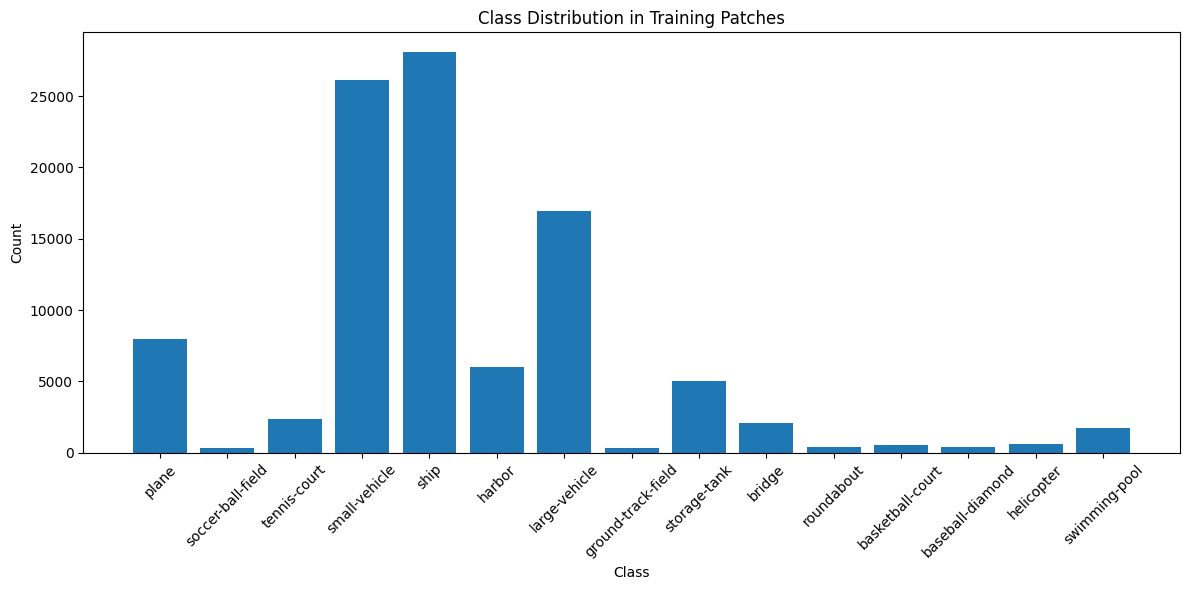

In [ ]:
# Step 14 - Cell 1: Plot class distribution for training patches
import os
import matplotlib.pyplot as plt
from collections import Counter

# Path to training patch folder
patch_dir = 'cropped_patches'

# Extract class names from filenames
train_filenames = os.listdir(patch_dir)
train_classes = [fname.split('_')[0] for fname in train_filenames if fname.endswith('.jpg')]

# Count class occurrences
class_counts = Counter(train_classes)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.title('Class Distribution in Training Patches')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 14. 2 class distribution validation

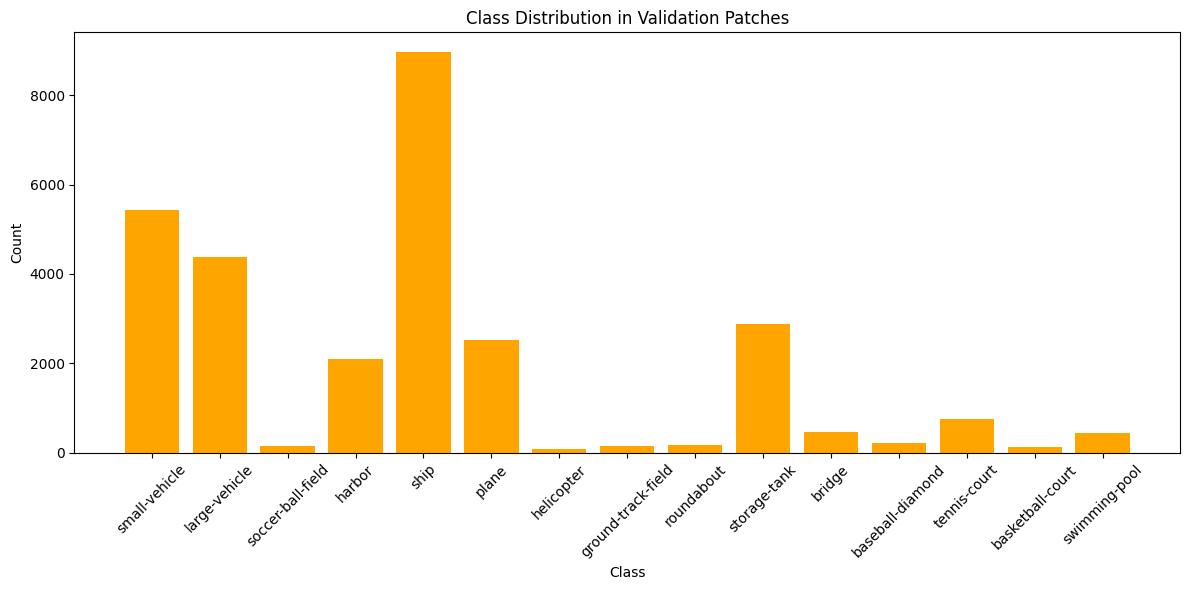

In [ ]:
# Step 14 - Cell 2: Plot class distribution for validation patches
import os
import matplotlib.pyplot as plt
from collections import Counter

# Path to validation patch folder
val_patch_dir = 'cropped_patches_val'

# Extract class names from filenames
val_filenames = os.listdir(val_patch_dir)
val_classes = [fname.split('_')[0] for fname in val_filenames if fname.endswith('.jpg')]

# Count class occurrences
val_class_counts = Counter(val_classes)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(val_class_counts.keys(), val_class_counts.values(), color='orange')
plt.xticks(rotation=45)
plt.title('Class Distribution in Validation Patches')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 15.1 preprocess training patches to npy

In [ ]:
# Step 15 – Cell 1: Convert training patches to 128x128 RGB .npy batches
import os, cv2, numpy as np
import gc

# Parameters
input_dir = 'cropped_patches'
output_dir = 'processed/train_npy_128'
image_size = (128, 128)
batch_size = 500

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get list of image files
image_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.jpg')])
total_images = len(image_files)
print(f"Total training images: {total_images}")

# Process in batches
for start in range(0, total_images, batch_size):
    end = min(start + batch_size, total_images)
    batch_files = image_files[start:end]
    batch_index = start // batch_size
    batch_output_path = os.path.join(output_dir, f'batch_{batch_index:03d}.npy')

    # ✅ Skip if already saved
    if os.path.exists(batch_output_path):
        print(f"⏩ Skipping batch {batch_index:03d} (already exists)")
        continue

    # Load and process batch
    print(f"⚙️ Processing batch {batch_index:03d} ({start}-{end-1})")
    batch_data = []

    for fname in batch_files:
        path = os.path.join(input_dir, fname)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, image_size)
        img = img.astype(np.float32) / 255.0  # Normalize
        batch_data.append(img)

    # Convert to numpy and save
    batch_array = np.stack(batch_data)
    np.save(batch_output_path, batch_array)
    print(f"✅ Saved batch to {batch_output_path}")

    # Free memory
    del batch_data, batch_array
    gc.collect()

Total training images: 98906
⏩ Skipping batch 000 (already exists)
⏩ Skipping batch 001 (already exists)
⏩ Skipping batch 002 (already exists)
⏩ Skipping batch 003 (already exists)
⏩ Skipping batch 004 (already exists)
⏩ Skipping batch 005 (already exists)
⏩ Skipping batch 006 (already exists)
⏩ Skipping batch 007 (already exists)
⏩ Skipping batch 008 (already exists)
⏩ Skipping batch 009 (already exists)
⏩ Skipping batch 010 (already exists)
⏩ Skipping batch 011 (already exists)
⏩ Skipping batch 012 (already exists)
⏩ Skipping batch 013 (already exists)
⏩ Skipping batch 014 (already exists)
⏩ Skipping batch 015 (already exists)
⏩ Skipping batch 016 (already exists)
⏩ Skipping batch 017 (already exists)
⏩ Skipping batch 018 (already exists)
⏩ Skipping batch 019 (already exists)
⏩ Skipping batch 020 (already exists)
⏩ Skipping batch 021 (already exists)
⏩ Skipping batch 022 (already exists)
⏩ Skipping batch 023 (already exists)
⏩ Skipping batch 024 (already exists)
⏩ Skipping batch 025 

### verifying total train image patches

In [ ]:
import os
print("Total .jpg patches in cropped_patches:", len([f for f in os.listdir('cropped_patches') if f.endswith('.jpg')]))

Total .jpg patches in cropped_patches: 98906


### 15.2 Preprocess Test Patches to .npy

In [ ]:
# Step 15 – Cell 2: Convert test patches to 128x128 RGB .npy batches
import os, cv2, numpy as np
import gc

# Parameters
input_dir = 'cropped_patches_val'
output_dir = 'processed/test_npy_128'
image_size = (128, 128)
batch_size = 500

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get list of image files
image_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.jpg')])
total_images = len(image_files)
print(f"Total test images: {total_images}")

# Process in batches
for start in range(0, total_images, batch_size):
    end = min(start + batch_size, total_images)
    batch_files = image_files[start:end]
    batch_index = start // batch_size
    batch_output_path = os.path.join(output_dir, f'batch_{batch_index:03d}.npy')

    # ✅ Skip if already saved
    if os.path.exists(batch_output_path):
        print(f"⏩ Skipping batch {batch_index:03d} (already exists)")
        continue

    # Load and process batch
    print(f"⚙️ Processing batch {batch_index:03d} ({start}-{end-1})")
    batch_data = []

    for fname in batch_files:
        path = os.path.join(input_dir, fname)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, image_size)
        img = img.astype(np.float32) / 255.0  # Normalize
        batch_data.append(img)

    # Convert to numpy and save
    batch_array = np.stack(batch_data)
    np.save(batch_output_path, batch_array)
    print(f"✅ Saved batch to {batch_output_path}")

    # Free memory
    del batch_data, batch_array
    gc.collect()

Total test images: 28853
⏩ Skipping batch 000 (already exists)
⏩ Skipping batch 001 (already exists)
⏩ Skipping batch 002 (already exists)
⏩ Skipping batch 003 (already exists)
⏩ Skipping batch 004 (already exists)
⏩ Skipping batch 005 (already exists)
⏩ Skipping batch 006 (already exists)
⏩ Skipping batch 007 (already exists)
⏩ Skipping batch 008 (already exists)
⏩ Skipping batch 009 (already exists)
⏩ Skipping batch 010 (already exists)
⏩ Skipping batch 011 (already exists)
⏩ Skipping batch 012 (already exists)
⏩ Skipping batch 013 (already exists)
⏩ Skipping batch 014 (already exists)
⏩ Skipping batch 015 (already exists)
⏩ Skipping batch 016 (already exists)
⏩ Skipping batch 017 (already exists)
⏩ Skipping batch 018 (already exists)
⏩ Skipping batch 019 (already exists)
⏩ Skipping batch 020 (already exists)
⏩ Skipping batch 021 (already exists)
⏩ Skipping batch 022 (already exists)
⏩ Skipping batch 023 (already exists)
⏩ Skipping batch 024 (already exists)
⏩ Skipping batch 025 (alr

### 16.1 Encoding train labels

In [ ]:
# Encoding Train Labels
import os
import numpy as np
import pickle
import gc

# Output file
label_path = 'train_labels.npy'
if os.path.exists(label_path):
    print(f"⏩ Skipping train label encoding — already exists at {label_path}")
else:
    # Load class list
    with open('train_label_classes.pkl', 'rb') as f:
        class_names = pickle.load(f)
    class_to_index = {name: idx for idx, name in enumerate(class_names)}
    print("✅ Class mapping loaded.")

    # Encode train labels
    train_patch_dir = 'cropped_patches'
    train_files = sorted([f for f in os.listdir(train_patch_dir) if f.endswith('.jpg')])

    train_labels = []
    for fname in train_files:
        class_name = fname.split('_')[0]
        class_index = class_to_index.get(class_name, -1)
        if class_index == -1:
            print(f"⚠️ Unknown class in filename: {fname}")
        train_labels.append(class_index)

    train_labels = np.array(train_labels)
    np.save(label_path, train_labels)
    print(f"✅ Saved {label_path} — Total labels: {len(train_labels)}")

    # Free memory
    del train_labels, train_files
    gc.collect()

⏩ Skipping train label encoding — already exists at train_labels.npy


### 16.2 Encoding test labels

In [ ]:
# Step 16 – Cell 2: Encode test labels (standalone version)
import os
import numpy as np
import pickle
import gc

# Output file
label_path = 'test_labels.npy'
if os.path.exists(label_path):
    print(f"⏩ Skipping test label encoding — already exists at {label_path}")
else:
    # ✅ Load class list
    with open('train_label_classes.pkl', 'rb') as f:
        class_names = pickle.load(f)
    class_to_index = {name: idx for idx, name in enumerate(class_names)}
    print("✅ Class mapping loaded.")

    # Encode test labels
    test_patch_dir = 'cropped_patches_val'
    test_files = sorted([f for f in os.listdir(test_patch_dir) if f.endswith('.jpg')])

    test_labels = []
    for fname in test_files:
        class_name = fname.split('_')[0]
        class_index = class_to_index.get(class_name, -1)
        if class_index == -1:
            print(f"⚠️ Unknown class in filename: {fname}")
        test_labels.append(class_index)

    test_labels = np.array(test_labels)
    np.save(label_path, test_labels)
    print(f"✅ Saved {label_path} — Total labels: {len(test_labels)}")

    # Free memory
    del test_labels, test_files
    gc.collect()


⏩ Skipping test label encoding — already exists at test_labels.npy


### 17.1 Stratified split 80/20

In [ ]:
# Stratifies sampling for train set and splitting 80/20 train-test
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import os

# Load full label list (length = 98,906)
label_path = 'train_labels.npy'
labels = np.load(label_path)

# Only run if split files don't exist
if not os.path.exists('train_indices.npy') or not os.path.exists('val_indices.npy'):
    # Stratified 80/20 split
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, val_idx in splitter.split(np.zeros(len(labels)), labels):
        np.save('train_indices.npy', train_idx)
        np.save('val_indices.npy', val_idx)
        print(f"✅ Saved {len(train_idx)} train indices and {len(val_idx)} val indices.")
else:
    print("⏩ Train/val index files already exist — skipping split.")

⏩ Train/val index files already exist — skipping split.


### 17.2 sanity check split balance

In [ ]:
import numpy as np
from collections import Counter

# Load indices and labels
train_idx = np.load('train_indices.npy')
val_idx = np.load('val_indices.npy')
labels = np.load('train_labels.npy')

train_labels = labels[train_idx]
val_labels = labels[val_idx]

# Count class distribution
print(" Train class counts:")
print(dict(Counter(train_labels)))
print("\n Val class counts:")
print(dict(Counter(val_labels)))

 Train class counts:
{np.int64(4): 4786, np.int64(10): 20901, np.int64(6): 13575, np.int64(7): 6377, np.int64(9): 22454, np.int64(12): 4023, np.int64(14): 1893, np.int64(13): 1389, np.int64(2): 1638, np.int64(0): 332, np.int64(11): 261, np.int64(1): 412, np.int64(5): 504, np.int64(8): 319, np.int64(3): 260}

 Val class counts:
{np.int64(9): 5614, np.int64(10): 5225, np.int64(12): 1006, np.int64(6): 3394, np.int64(5): 126, np.int64(14): 474, np.int64(0): 83, np.int64(7): 1594, np.int64(2): 409, np.int64(11): 65, np.int64(13): 347, np.int64(4): 1197, np.int64(1): 103, np.int64(3): 65, np.int64(8): 80}


### 17.3 Save labels to reuse

In [ ]:
# 17.3 save labels to reuse
import numpy as np
import os

train_split_path = 'train_labels_split.npy'
val_split_path = 'val_labels_split.npy'

if os.path.exists(train_split_path) and os.path.exists(val_split_path):
    print("⏩ train_labels_split.npy and val_labels_split.npy already exist — skipping save.")
else:
    full_labels = np.load('train_labels.npy')
    train_idx = np.load('train_indices.npy')
    val_idx = np.load('val_indices.npy')

    train_labels = full_labels[train_idx]
    val_labels = full_labels[val_idx]

    np.save(train_split_path, train_labels)
    np.save(val_split_path, val_labels)
    print("✅ Saved train/val label split files.")

⏩ train_labels_split.npy and val_labels_split.npy already exist — skipping save.


### checking folder existance

In [ ]:
import os
print(os.listdir('processed/train_npy_128'))  # Should show your .npy batches

['batch_000.npy', 'batch_001.npy', 'batch_002.npy', 'batch_003.npy', 'batch_004.npy', 'batch_005.npy', 'batch_006.npy', 'batch_007.npy', 'batch_008.npy', 'batch_009.npy', 'batch_010.npy', 'batch_011.npy', 'batch_012.npy', 'batch_013.npy', 'batch_014.npy', 'batch_015.npy', 'batch_016.npy', 'batch_017.npy', 'batch_018.npy', 'batch_019.npy', 'batch_020.npy', 'batch_021.npy', 'batch_022.npy', 'batch_023.npy', 'batch_024.npy', 'batch_025.npy', 'batch_026.npy', 'batch_027.npy', 'batch_028.npy', 'batch_029.npy', 'batch_030.npy', 'batch_031.npy', 'batch_032.npy', 'batch_033.npy', 'batch_034.npy', 'batch_035.npy', 'batch_036.npy', 'batch_037.npy', 'batch_038.npy', 'batch_039.npy', 'batch_040.npy', 'batch_041.npy', 'batch_042.npy', 'batch_043.npy', 'batch_044.npy', 'batch_045.npy', 'batch_046.npy', 'batch_047.npy', 'batch_048.npy', 'batch_049.npy', 'batch_050.npy', 'batch_051.npy', 'batch_052.npy', 'batch_053.npy', 'batch_054.npy', 'batch_055.npy', 'batch_056.npy', 'batch_057.npy', 'batch_058.np

### 18.1 saving sorted list of .npys batch path files for training

In [ ]:
import os
import numpy as np
import gc

# Paths
batch_dir = 'processed/train_npy_128'
output_path = 'train_batch_files.npy'

# ✅ Skip if already exists
if os.path.exists(output_path):
    print(f"⏩ Skipping Step 18.1: '{output_path}' already exists.")
else:
    print("⚙️ Step 18.1: Scanning training .npy batches...")

    # Get sorted list of full paths to batch_###.npy
    batch_files = sorted([
        os.path.join(batch_dir, f)
        for f in os.listdir(batch_dir)
        if f.endswith('.npy')
    ])

    # Save file list
    np.save(output_path, np.array(batch_files))
    print(f"✅ Saved {len(batch_files)} batch file paths to '{output_path}'")

    # Cleanup
    del batch_files
    gc.collect()

⚙️ Step 18.1: Scanning training .npy batches...
✅ Saved 198 batch file paths to 'train_batch_files.npy'


### 18.2.1 loading of indices/ labels

In [ ]:
# Prepares directory, loads indices/labels, checks for skip condition

import os
import numpy as np
import gc

# Parameters
output_dir = 'train_parts'
os.makedirs(output_dir, exist_ok=True)

# Skip if files already exist
existing_parts = [f for f in os.listdir(output_dir) if f.startswith('X_train_part_')]
if existing_parts:
    print(f"⏩ Skipping Step 18.2: Found {len(existing_parts)} existing part files in '{output_dir}/'")
else:
    print("⚙️ Step 18.2: Setup and loading...")

    # Load required arrays
    train_indices = np.load('train_indices.npy')            # int64
    train_labels = np.load('train_labels.npy')              # int64
    batch_files = np.load('train_batch_files.npy')          # array of strings (batch paths)

    print(f"✅ Loaded: {len(train_indices)} train indices")
    print(f"✅ Loaded: {len(train_labels)} total labels")
    print(f"✅ Loaded: {len(batch_files)} batch file paths")

    # Garbage collect immediately after setup
    gc.collect()

⚙️ Step 18.2: Setup and loading...
✅ Loaded: 79124 train indices
✅ Loaded: 98906 total labels
✅ Loaded: 198 batch file paths


### 18.2.2 batch of 1000 samples extracted and saved as x and y part files

In [ ]:
# This script loads batches from train_npy_128,
# selects only the samples indexed by train_indices.npy,
# and saves them in separate X/y part files (1,000 samples per file)
# with skip logic to avoid overwriting if re-run.

import numpy as np
import os
import gc

# === CONFIGURATION ===
samples_per_part = 1000                                 # Max samples per saved part file
output_dir = 'train_parts'                              # Directory to save part files
os.makedirs(output_dir, exist_ok=True)                  # Create if missing

# === LOAD REQUIRED ARRAYS (independent cell) ===
train_indices = np.load('train_indices.npy')            # Indices for training samples (length ~79,124)
train_labels = np.load('train_labels.npy')              # Full label array (length = 98,906)
batch_files = np.load('train_batch_files.npy')          # Sorted list of all batch_###.npy files

# === PREPARE FOR EXTRACTION ===
train_index_set = set(train_indices.tolist())           # Fast lookup of index
global_index = 0                                        # Tracks global position across all batches
current_X, current_y = [], []                           # Temporary lists to hold one part at a time
saved_part = 0                                          # Index for naming part files
sample_counter = 0                                      # Total samples processed

print(f"⚙️ Step 18.2: Extracting training samples (target = {len(train_indices)}), saving in chunks of {samples_per_part}...")

# === MAIN BATCH LOOP ===
for batch_path in batch_files:
    batch_data = np.load(batch_path, mmap_mode='r')     # Load batch using memory mapping
    batch_size = batch_data.shape[0]

    for local_idx in range(batch_size):
        if global_index in train_index_set:
            # Accumulate current training sample
            current_X.append(batch_data[local_idx])
            current_y.append(train_labels[global_index])
            sample_counter += 1

            # === When part is full, check skip, save, clear memory ===
            if len(current_X) == samples_per_part:
                x_path = os.path.join(output_dir, f'X_train_part_{saved_part:03d}.npy')
                y_path = os.path.join(output_dir, f'y_train_part_{saved_part:03d}.npy')

                if os.path.exists(x_path) and os.path.exists(y_path):
                    print(f"⏩ Skipping part {saved_part:03d} — files already exist.")
                else:
                    X_arr = np.stack(current_X)                          # Shape: (1000, 128, 128, 3)
                    y_arr = np.array(current_y, dtype=np.int64)         # Shape: (1000,)
                    np.save(x_path, X_arr)
                    np.save(y_path, y_arr)
                    print(f"✅ Saved part {saved_part:03d} with {len(X_arr)} samples")

                    # Cleanup
                    del X_arr, y_arr
                    gc.collect()

                current_X, current_y = [], []
                saved_part += 1

        global_index += 1  # Always increment

    # === GC after every batch file ===
    del batch_data
    gc.collect()

# === SAVE FINAL LEFTOVER (if any) ===
if len(current_X) > 0:
    x_path = os.path.join(output_dir, f'X_train_part_{saved_part:03d}.npy')
    y_path = os.path.join(output_dir, f'y_train_part_{saved_part:03d}.npy')

    if os.path.exists(x_path) and os.path.exists(y_path):
        print(f"⏩ Skipping final part {saved_part:03d} — files already exist.")
    else:
        X_arr = np.stack(current_X)
        y_arr = np.array(current_y, dtype=np.int64)
        np.save(x_path, X_arr)
        np.save(y_path, y_arr)
        print(f"✅ Saved final part {saved_part:03d} with {len(X_arr)} samples")

        del X_arr, y_arr
        gc.collect()

    del current_X, current_y
    gc.collect()

print(f"🏁 Done — total samples processed: {sample_counter}")

⚙️ Step 18.2: Extracting training samples (target = 79124), saving in chunks of 1000...
⏩ Skipping part 000 — files already exist.
⏩ Skipping part 001 — files already exist.
⏩ Skipping part 002 — files already exist.
⏩ Skipping part 003 — files already exist.
⏩ Skipping part 004 — files already exist.
⏩ Skipping part 005 — files already exist.
⏩ Skipping part 006 — files already exist.
⏩ Skipping part 007 — files already exist.
⏩ Skipping part 008 — files already exist.
⏩ Skipping part 009 — files already exist.
⏩ Skipping part 010 — files already exist.
⏩ Skipping part 011 — files already exist.
⏩ Skipping part 012 — files already exist.
✅ Saved part 013 with 1000 samples
✅ Saved part 014 with 1000 samples
✅ Saved part 015 with 1000 samples
✅ Saved part 016 with 1000 samples
✅ Saved part 017 with 1000 samples
✅ Saved part 018 with 1000 samples
✅ Saved part 019 with 1000 samples
✅ Saved part 020 with 1000 samples
✅ Saved part 021 with 1000 samples
✅ Saved part 022 with 1000 samples
✅ S

### 18.2.3 extract and save batch of 1000 samples for x_val and y_val

In [ ]:
# Extract & Save Validation Samples ===
# From val_indices.npy, extract matching samples from training batches
# Save in separate X/y files in val_parts/ in chunks of 1,000
# Includes skip logic and full memory protection

import numpy as np
import os
import gc

# === CONFIGURATION ===
samples_per_part = 1000
output_dir = 'val_parts'
os.makedirs(output_dir, exist_ok=True)

# === LOAD INPUT ARRAYS (standalone-safe) ===
val_indices = np.load('val_indices.npy')                # Indices for validation (≈ 19,782)
train_labels = np.load('train_labels.npy')              # Full labels array (98,906)
batch_files = np.load('train_batch_files.npy')          # List of batch_###.npy files

# === PREPARE FOR LOOP ===
val_index_set = set(val_indices.tolist())               # Convert to set for fast lookup
global_index = 0                                        # Tracks global index across batches
current_X, current_y = [], []                           # Part-wise accumulators
saved_part = 0                                          # Counter for saved files
sample_counter = 0                                      # Total saved samples

print(f"⚙️ Step 18.3: Extracting validation samples (target = {len(val_indices)}), saving in chunks of {samples_per_part}...")

# === MAIN LOOP OVER BATCHES ===
for batch_path in batch_files:
    batch_data = np.load(batch_path, mmap_mode='r')     # Memory-efficient loading
    batch_size = batch_data.shape[0]

    for local_idx in range(batch_size):
        if global_index in val_index_set:
            current_X.append(batch_data[local_idx])
            current_y.append(train_labels[global_index])
            sample_counter += 1

            # === Save when full ===
            if len(current_X) == samples_per_part:
                x_path = os.path.join(output_dir, f'X_val_part_{saved_part:03d}.npy')
                y_path = os.path.join(output_dir, f'y_val_part_{saved_part:03d}.npy')

                if os.path.exists(x_path) and os.path.exists(y_path):
                    print(f"⏩ Skipping part {saved_part:03d} — files already exist.")
                else:
                    X_arr = np.stack(current_X)
                    y_arr = np.array(current_y, dtype=np.int64)
                    np.save(x_path, X_arr)
                    np.save(y_path, y_arr)
                    print(f"✅ Saved part {saved_part:03d} with {len(X_arr)} samples")

                    del X_arr, y_arr
                    gc.collect()

                current_X, current_y = [], []
                saved_part += 1

        global_index += 1  # Always increment

    # ✅ GC after each batch
    del batch_data
    gc.collect()

# === SAVE FINAL REMAINING PART ===
if len(current_X) > 0:
    x_path = os.path.join(output_dir, f'X_val_part_{saved_part:03d}.npy')
    y_path = os.path.join(output_dir, f'y_val_part_{saved_part:03d}.npy')

    if os.path.exists(x_path) and os.path.exists(y_path):
        print(f"⏩ Skipping final part {saved_part:03d} — files already exist.")
    else:
        X_arr = np.stack(current_X)
        y_arr = np.array(current_y, dtype=np.int64)
        np.save(x_path, X_arr)
        np.save(y_path, y_arr)
        print(f"✅ Saved final part {saved_part:03d} with {len(X_arr)} samples")

        del X_arr, y_arr
        gc.collect()

    del current_X, current_y
    gc.collect()

print(f"🏁 Step 18.3 complete — total validation samples saved: {sample_counter}")

⚙️ Step 18.3: Extracting validation samples (target = 19782), saving in chunks of 1000...
✅ Saved part 000 with 1000 samples
✅ Saved part 001 with 1000 samples
✅ Saved part 002 with 1000 samples
✅ Saved part 003 with 1000 samples
✅ Saved part 004 with 1000 samples
✅ Saved part 005 with 1000 samples
✅ Saved part 006 with 1000 samples
✅ Saved part 007 with 1000 samples
✅ Saved part 008 with 1000 samples
✅ Saved part 009 with 1000 samples
✅ Saved part 010 with 1000 samples
✅ Saved part 011 with 1000 samples
✅ Saved part 012 with 1000 samples
✅ Saved part 013 with 1000 samples
✅ Saved part 014 with 1000 samples
✅ Saved part 015 with 1000 samples
✅ Saved part 016 with 1000 samples
✅ Saved part 017 with 1000 samples
✅ Saved part 018 with 1000 samples
✅ Saved final part 019 with 782 samples
🏁 Step 18.3 complete — total validation samples saved: 19782


### 18.2.4 verification of saved and train val parts

In [ ]:
# Verify saved train and val part files ===

import os
import numpy as np

# === Configuration ===
train_dir = 'train_parts'
val_dir = 'val_parts'

# === Helper to check counts and shapes ===
def verify_parts(part_dir, prefix):
    x_files = sorted([f for f in os.listdir(part_dir) if f.startswith(f'X_{prefix}')])
    y_files = sorted([f for f in os.listdir(part_dir) if f.startswith(f'y_{prefix}')])

    assert len(x_files) == len(y_files), f"Mismatch in X and y files in {part_dir}"

    total_samples = 0
    for x_file, y_file in zip(x_files, y_files):
        x_path = os.path.join(part_dir, x_file)
        y_path = os.path.join(part_dir, y_file)

        X = np.load(x_path, mmap_mode='r')
        y = np.load(y_path, mmap_mode='r')

        assert len(X) == len(y), f"❌ Length mismatch in {x_file} and {y_file}"
        assert X.shape[1:] == (128, 128, 3), f"❌ Unexpected X shape in {x_file}: {X.shape}"
        assert y.dtype == np.int64, f"❌ Unexpected Y dtype in {y_file}: {y.dtype}"

        total_samples += len(X)

    print(f"✅ {prefix.upper()} parts verified: {len(x_files)} files, total samples = {total_samples}")

# === Run checks ===
verify_parts(train_dir, 'train')
verify_parts(val_dir, 'val')

✅ TRAIN parts verified: 80 files, total samples = 79124
✅ VAL parts verified: 20 files, total samples = 19782


### 19.1 created and Saved sorted test batch path

In [ ]:
# Save sorted test batch file paths
# Reads all .npy files from processed/test_npy_128/
# Saves list as test_batch_files.npy with skip logic

import os
import numpy as np
import gc

# Paths
test_batch_dir = 'processed/test_npy_128'
output_path = 'test_batch_files.npy'

# ✅ Skip if already exists
if os.path.exists(output_path):
    print(f"⏩ Skipping Step 19.1: '{output_path}' already exists.")
else:
    print("⚙️ Step 19.1: Scanning test .npy batches...")

    # Get sorted list of full paths
    test_files = sorted([
        os.path.join(test_batch_dir, f)
        for f in os.listdir(test_batch_dir)
        if f.endswith('.npy')
    ])

    # Save to .npy file
    np.save(output_path, np.array(test_files))
    print(f"✅ Saved {len(test_files)} test batch file paths to '{output_path}'")

    # Cleanup
    del test_files
    gc.collect()


⚙️ Step 19.1: Scanning test .npy batches...
✅ Saved 58 test batch file paths to 'test_batch_files.npy'


### 19.2.1 creating test_indices.npy

In [ ]:
# Create test_indices.npy with full mapping
# For each test sample, store its (batch_id, local_index)
# This allows us to later locate any test sample without loading all batches into memory

import os
import numpy as np
import gc

# === CONFIGURATION ===
# Paths for inputs and output
batch_file_list = 'test_batch_files.npy'        # Previously saved in Step 19.1
output_path = 'test_indices.npy'                # Final mapping to be saved here

# === SKIP LOGIC: Prevent re-processing if already saved
if os.path.exists(output_path):
    print(f"⏩ Skipping Step 19.2: '{output_path}' already exists.")
else:
    print("⚙️ Step 19.2: Creating index map for test samples...")

    # === LOAD: Sorted list of batch_###.npy file paths
    test_batches = np.load(batch_file_list)

    # === PREPARE: Create an index list to hold (batch_id, local_index)
    index_list = []

    # === MAIN LOOP: Iterate through all batches
    for batch_id, path in enumerate(test_batches):
        # Load current test batch (memory-mapped to avoid RAM issues)
        batch_data = np.load(path, mmap_mode='r')
        batch_len = batch_data.shape[0]

        # For each image in this batch, store (batch_id, local_index)
        for local_idx in range(batch_len):
            index_list.append((batch_id, local_idx))

        # === GC: Free memory after each batch
        del batch_data
        gc.collect()

    # === SAVE: Convert to NumPy array and store as .npy file
    index_array = np.array(index_list, dtype=np.int16)   # Shape: (28853, 2)
    np.save(output_path, index_array)
    print(f"✅ Saved '{output_path}' — shape: {index_array.shape}")

    # Final cleanup
    del index_list, index_array
    gc.collect()

⚙️ Step 19.2: Creating index map for test samples...
✅ Saved 'test_indices.npy' — shape: (28853, 2)


### no need to rerun at the moment below teo cells delete later

### 19.2.2 test_parts, x_test and y_test

In [ ]:
# Step 19.2.2 –Extract test samples using test_indices.npy
# Saves them to test_parts/ as batches of 1,000 samples (X and y) with skip logic, RAM safety, and GC

import os
import numpy as np
import gc

# === CONFIGURATION ===
samples_per_part = 1000
output_dir = 'test_parts'
os.makedirs(output_dir, exist_ok=True)

# === LOAD ARRAYS ===
test_indices = np.load('test_indices.npy')             # Shape: (28853, 2)
test_labels = np.load('test_labels.npy')               # Shape: (28853,)
test_batch_files = np.load('test_batch_files.npy')     # Paths to .npy batch files

# === PART-WISE ACCUMULATORS ===
current_X, current_y = [], []
saved_part = 0
sample_counter = 0

print(f"⚙️ Step 19.2.2: Saving 29 test parts — total_samples: {len(test_indices)}")

# === MAIN LOOP OVER INDEX MAPPING ===
for i, (batch_id, local_idx) in enumerate(test_indices):
    batch_path = test_batch_files[batch_id]
    batch_data = np.load(batch_path, mmap_mode='r')         # Load only what's needed
    sample = batch_data[local_idx]                           # One image

    current_X.append(sample)
    current_y.append(test_labels[i])
    sample_counter += 1

    # ✅ Save full part
    if len(current_X) == samples_per_part:
        x_path = os.path.join(output_dir, f'X_test_part_{saved_part:03d}.npy')
        y_path = os.path.join(output_dir, f'y_test_part_{saved_part:03d}.npy')

        if os.path.exists(x_path) and os.path.exists(y_path):
            print(f"⏩ Skipping part {saved_part:03d} — already exists")
        else:
            X_arr = np.stack(current_X)                          # Shape: (1000, 128, 128, 3)
            y_arr = np.array(current_y, dtype=np.int64)          # Shape: (1000,)
            np.save(x_path, X_arr)
            np.save(y_path, y_arr)
            print(f"✅ Saved part {saved_part:03d} with {len(X_arr)} samples")

            del X_arr, y_arr
            gc.collect()

        current_X, current_y = [], []
        saved_part += 1

    del batch_data
    gc.collect()

# === SAVE REMAINING FINAL PART (if any) ===
if len(current_X) > 0:
    x_path = os.path.join(output_dir, f'X_test_part_{saved_part:03d}.npy')
    y_path = os.path.join(output_dir, f'y_test_part_{saved_part:03d}.npy')

    if os.path.exists(x_path) and os.path.exists(y_path):
        print(f"⏩ Skipping final part {saved_part:03d} — already exists")
    else:
        X_arr = np.stack(current_X)
        y_arr = np.array(current_y, dtype=np.int64)
        np.save(x_path, X_arr)
        np.save(y_path, y_arr)
        print(f"✅ Saved final part {saved_part:03d} with {len(X_arr)} samples")

        del X_arr, y_arr
        gc.collect()

    del current_X, current_y
    gc.collect()

print(f"🏁 Step 19.2.2 complete — total test samples saved: {sample_counter}")

⚙️ Step 19.2.2: Saving 29 test parts — total_samples: 28853
✅ Saved part 000 with 1000 samples
✅ Saved part 001 with 1000 samples
✅ Saved part 002 with 1000 samples
✅ Saved part 003 with 1000 samples
✅ Saved part 004 with 1000 samples
✅ Saved part 005 with 1000 samples
✅ Saved part 006 with 1000 samples
✅ Saved part 007 with 1000 samples
✅ Saved part 008 with 1000 samples
✅ Saved part 009 with 1000 samples
✅ Saved part 010 with 1000 samples
✅ Saved part 011 with 1000 samples
✅ Saved part 012 with 1000 samples
✅ Saved part 013 with 1000 samples
✅ Saved part 014 with 1000 samples
✅ Saved part 015 with 1000 samples
✅ Saved part 016 with 1000 samples
✅ Saved part 017 with 1000 samples
✅ Saved part 018 with 1000 samples
✅ Saved part 019 with 1000 samples
✅ Saved part 020 with 1000 samples
✅ Saved part 021 with 1000 samples
✅ Saved part 022 with 1000 samples
✅ Saved part 023 with 1000 samples
✅ Saved part 024 with 1000 samples
✅ Saved part 025 with 1000 samples
✅ Saved part 026 with 1000 sam

### 19.2.3 verification of test_parts

In [ ]:
# Step 19.2.3 – Verify test part files

import os
import numpy as np

# === Configuration ===
test_dir = 'test_parts'

# === List part files ===
x_files = sorted([f for f in os.listdir(test_dir) if f.startswith('X_test_part_')])
y_files = sorted([f for f in os.listdir(test_dir) if f.startswith('y_test_part_')])

# === Basic file count check ===
assert len(x_files) == len(y_files), " Mismatch in number of X and y test part files"
print(f"✅ Found {len(x_files)} test part file pairs.")

# === Detailed shape and type checks ===
total_samples = 0

for x_file, y_file in zip(x_files, y_files):
    x_path = os.path.join(test_dir, x_file)
    y_path = os.path.join(test_dir, y_file)

    X = np.load(x_path, mmap_mode='r')
    y = np.load(y_path, mmap_mode='r')

    assert len(X) == len(y), f" Mismatch in {x_file} and {y_file}: {len(X)} vs {len(y)}"
    assert X.shape[1:] == (128, 128, 3), f" Wrong X shape in {x_file}: {X.shape}"
    assert y.dtype == np.int64, f" Wrong y dtype in {y_file}: {y.dtype}"

    total_samples += len(X)

print(f"✅ All test parts verified — total samples = {total_samples}")

✅ Found 29 test part file pairs.
✅ All test parts verified — total samples = 28853


### check the pixel type and range from train part

In [ ]:
import numpy as np

# Load the entire train part as a single array
X = np.load('train_parts/X_train_part_000.npy')  # full array: shape (1000, 128, 128, 3)

# Check the first 5 images
for i in range(5):
    img = X[i]
    print(f"Sample {i}: shape = {img.shape}, dtype = {img.dtype}, min = {img.min():.4f}, max = {img.max():.4f}")

Sample 0: shape = (128, 128, 3), dtype = float32, min = 0.0000, max = 0.8510
Sample 1: shape = (128, 128, 3), dtype = float32, min = 0.0000, max = 0.9608
Sample 2: shape = (128, 128, 3), dtype = float32, min = 0.0000, max = 0.8235
Sample 3: shape = (128, 128, 3), dtype = float32, min = 0.0000, max = 0.6824
Sample 4: shape = (128, 128, 3), dtype = float32, min = 0.0000, max = 0.8549


In [ ]:
import os
import numpy as np
file = 'train_parts/X_train_part_000.npy'
arr = np.load(file)
print(f"{file} → shape: {arr.shape}, dtype: {arr.dtype}, size: {arr.size}")

train_parts/X_train_part_000.npy → shape: (1000, 128, 128, 3), dtype: float32, size: 49152000


## MODELING

### SGD CLASSIFIER

### 20.1.A-1 Fit IncrementalPCA on Train Parts

In [ ]:
# Step 20.1.A-1 (RAM-Safe): Fit IncrementalPCA and save

import os
import numpy as np
import gc
from sklearn.decomposition import IncrementalPCA
import joblib

# === A. Configurations ===
input_dir = 'train_parts'
save_path = 'models/pca_model.pkl'
n_components = 300
batch_size = 1000    # Matches your part sizes safely

# === B. Skip logic ===
if os.path.exists(save_path):
    print(f"⏩ Skipping PCA fit — already exists at '{save_path}'")
else:
    print("⚙️ Step 20.1-A.1: Fitting IncrementalPCA on training data...")

    # === C. Prepare PCA object ===
    pca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

    # === D. Loop over each X_train_part file ===
    part_files = sorted([f for f in os.listdir(input_dir) if f.startswith('X_train_part') and f.endswith('.npy')])

    for part_id, fname in enumerate(part_files):
        part_path = os.path.join(input_dir, fname)
        X_part = np.load(part_path)  # (batch_size, 128, 128, 3)

        # Flatten to (batch_size, 49152)
        X_flat = X_part.reshape(X_part.shape[0], -1)

        print(f"🔄 Fitting batch {part_id:03d} → {X_flat.shape}")
        pca.partial_fit(X_flat)

        # Cleanup
        del X_part, X_flat
        gc.collect()

    # === E. Save fitted PCA model ===
    os.makedirs('models', exist_ok=True)
    joblib.dump(pca, save_path)
    print(f"✅ Saved IncrementalPCA model to: {save_path}")

    del pca
    gc.collect()

⚙️ Step 20.1-A.1: Fitting IncrementalPCA on training data...
🔄 Fitting batch 000 → (1000, 49152)
🔄 Fitting batch 001 → (1000, 49152)
🔄 Fitting batch 002 → (1000, 49152)
🔄 Fitting batch 003 → (1000, 49152)
🔄 Fitting batch 004 → (1000, 49152)
🔄 Fitting batch 005 → (1000, 49152)
🔄 Fitting batch 006 → (1000, 49152)
🔄 Fitting batch 007 → (1000, 49152)
🔄 Fitting batch 008 → (1000, 49152)
🔄 Fitting batch 009 → (1000, 49152)
🔄 Fitting batch 010 → (1000, 49152)
🔄 Fitting batch 011 → (1000, 49152)
🔄 Fitting batch 012 → (1000, 49152)
🔄 Fitting batch 013 → (1000, 49152)
🔄 Fitting batch 014 → (1000, 49152)
🔄 Fitting batch 015 → (1000, 49152)
🔄 Fitting batch 016 → (1000, 49152)
🔄 Fitting batch 017 → (1000, 49152)
🔄 Fitting batch 018 → (1000, 49152)
🔄 Fitting batch 019 → (1000, 49152)
🔄 Fitting batch 020 → (1000, 49152)
🔄 Fitting batch 021 → (1000, 49152)
🔄 Fitting batch 022 → (1000, 49152)
🔄 Fitting batch 023 → (1000, 49152)
🔄 Fitting batch 024 → (1000, 49152)
🔄 Fitting batch 025 → (1000, 49152)
🔄 F

### verification of fitted PCA for train

In [ ]:
import joblib
pca = joblib.load('models/pca_model.pkl')
print("PCA components:", pca.n_components_)
print("PCA fitted:", hasattr(pca, 'mean_'))  # Should be True

PCA components: 300
PCA fitted: True


### 20.1.A-2 Reduce and save each x_train part

In [ ]:
# Step 20.1-A.2: Apply PCA to each X_train_part_###.npy and save reduced versions

import os
import numpy as np
import gc
import joblib

# === A. Configuration ===
input_dir = 'train_parts'
output_dir = 'train_parts_reduced'
pca_model_path = 'models/pca_model.pkl'
os.makedirs(output_dir, exist_ok=True)

# === B. Load trained PCA model ===
if not os.path.exists(pca_model_path):
    raise FileNotFoundError(f" PCA model not found at: {pca_model_path}")
else:
    pca = joblib.load(pca_model_path)
    print(f" Loaded PCA model from: {pca_model_path}")

# === C. Process each train part ===
part_files = sorted([f for f in os.listdir(input_dir) if f.startswith('X_train_part') and f.endswith('.npy')])
print(f" Found {len(part_files)} training parts to transform")

for part_id, fname in enumerate(part_files):
    input_path = os.path.join(input_dir, fname)
    output_path = os.path.join(output_dir, f'X_train_reduced_part_{part_id:03d}.npy')

    #  Skip if already reduced
    if os.path.exists(output_path):
        print(f"⏩ Skipping part {part_id:03d} — already exists")
        continue

    # === D. Load and flatten this part ===
    X_part = np.load(input_path)  # Shape: (batch_size, 128, 128, 3)
    X_flat = X_part.reshape(X_part.shape[0], -1)  # Shape: (batch_size, 49152)

    # === E. Apply PCA transform ===
    X_reduced = pca.transform(X_flat)  # Shape: (batch_size, n_components)
    np.save(output_path, X_reduced)
    print(f"✅ Saved reduced part {part_id:03d} → shape: {X_reduced.shape}")

    # === F. Cleanup ===
    del X_part, X_flat, X_reduced
    gc.collect()

 Loaded PCA model from: models/pca_model.pkl
 Found 80 training parts to transform
✅ Saved reduced part 000 → shape: (1000, 300)
✅ Saved reduced part 001 → shape: (1000, 300)
✅ Saved reduced part 002 → shape: (1000, 300)
✅ Saved reduced part 003 → shape: (1000, 300)
✅ Saved reduced part 004 → shape: (1000, 300)
✅ Saved reduced part 005 → shape: (1000, 300)
✅ Saved reduced part 006 → shape: (1000, 300)
✅ Saved reduced part 007 → shape: (1000, 300)
✅ Saved reduced part 008 → shape: (1000, 300)
✅ Saved reduced part 009 → shape: (1000, 300)
✅ Saved reduced part 010 → shape: (1000, 300)
✅ Saved reduced part 011 → shape: (1000, 300)
✅ Saved reduced part 012 → shape: (1000, 300)
✅ Saved reduced part 013 → shape: (1000, 300)
✅ Saved reduced part 014 → shape: (1000, 300)
✅ Saved reduced part 015 → shape: (1000, 300)
✅ Saved reduced part 016 → shape: (1000, 300)
✅ Saved reduced part 017 → shape: (1000, 300)
✅ Saved reduced part 018 → shape: (1000, 300)
✅ Saved reduced part 019 → shape: (1000, 30

### verification of train parts reduced

In [ ]:
import os
import numpy as np

dir_path = 'train_parts_reduced'
files = sorted([f for f in os.listdir(dir_path) if f.startswith('X_train_reduced_part_')])
print(f"Found {len(files)} train reduced parts")

# Check first part shape
sample = np.load(os.path.join(dir_path, files[0]), mmap_mode='r')
print("Sample shape:", sample.shape)

Found 80 train reduced parts
Sample shape: (1000, 300)


### 20.1-B.1 Apply PCA to validation part and save reduced

In [ ]:
# step 20.1-B.1 Apply PCA to X_val_part_###.npy files and save reduced versions ===

import os
import numpy as np
import gc
import joblib

# === A. Configuration ===
input_dir = 'val_parts'
output_dir = 'val_parts_reduced'
pca_model_path = 'models/pca_model.pkl'
os.makedirs(output_dir, exist_ok=True)

# === B. Load trained PCA model ===
if not os.path.exists(pca_model_path):
    raise FileNotFoundError(f" PCA model not found at: {pca_model_path}")
else:
    pca = joblib.load(pca_model_path)
    print(f" Loaded PCA model from: {pca_model_path}")

# === C. Process each validation part ===
part_files = sorted([f for f in os.listdir(input_dir) if f.startswith('X_val_part') and f.endswith('.npy')])
print(f" Found {len(part_files)} validation parts to transform")

for part_id, fname in enumerate(part_files):
    input_path = os.path.join(input_dir, fname)
    output_path = os.path.join(output_dir, f'X_val_reduced_part_{part_id:03d}.npy')

    #  Skip if already reduced
    if os.path.exists(output_path):
        print(f"⏩ Skipping part {part_id:03d} — already exists")
        continue

    # === D. Load and flatten this part ===
    X_part = np.load(input_path)  # Shape: (batch_size, 128, 128, 3)
    X_flat = X_part.reshape(X_part.shape[0], -1)  # Shape: (batch_size, 49152)

    # === E. Apply PCA transform ===
    X_reduced = pca.transform(X_flat)  # Shape: (batch_size, 300)
    np.save(output_path, X_reduced)
    print(f"✅ Saved reduced val part {part_id:03d} → shape: {X_reduced.shape}")

    # === F. Cleanup ===
    del X_part, X_flat, X_reduced
    gc.collect()

 Loaded PCA model from: models/pca_model.pkl
 Found 20 validation parts to transform
✅ Saved reduced val part 000 → shape: (1000, 300)
✅ Saved reduced val part 001 → shape: (1000, 300)
✅ Saved reduced val part 002 → shape: (1000, 300)
✅ Saved reduced val part 003 → shape: (1000, 300)
✅ Saved reduced val part 004 → shape: (1000, 300)
✅ Saved reduced val part 005 → shape: (1000, 300)
✅ Saved reduced val part 006 → shape: (1000, 300)
✅ Saved reduced val part 007 → shape: (1000, 300)
✅ Saved reduced val part 008 → shape: (1000, 300)
✅ Saved reduced val part 009 → shape: (1000, 300)
✅ Saved reduced val part 010 → shape: (1000, 300)
✅ Saved reduced val part 011 → shape: (1000, 300)
✅ Saved reduced val part 012 → shape: (1000, 300)
✅ Saved reduced val part 013 → shape: (1000, 300)
✅ Saved reduced val part 014 → shape: (1000, 300)
✅ Saved reduced val part 015 → shape: (1000, 300)
✅ Saved reduced val part 016 → shape: (1000, 300)
✅ Saved reduced val part 017 → shape: (1000, 300)
✅ Saved reduced

### Verifcation of val parts reduced

In [ ]:
dir_path = 'val_parts_reduced'
files = sorted([f for f in os.listdir(dir_path) if f.startswith('X_val_reduced_part_')])
print(f"Found {len(files)} val reduced parts")

sample = np.load(os.path.join(dir_path, files[0]), mmap_mode='r')
print("Sample shape:", sample.shape)

Found 20 val reduced parts
Sample shape: (1000, 300)


### 20.1-c Apply PCA to test part and save reduced  

In [ ]:
# 20.1-C Apply PCA to X_test_part_###.npy and save reduced versions

import os
import numpy as np
import gc
import joblib

# === A. Configuration ===
input_dir = 'test_parts'
output_dir = 'test_parts_reduced'
pca_model_path = 'models/pca_model.pkl'
os.makedirs(output_dir, exist_ok=True)

# === B. Load trained PCA model ===
if not os.path.exists(pca_model_path):
    raise FileNotFoundError(f" PCA model not found at: {pca_model_path}")
else:
    pca = joblib.load(pca_model_path)
    print(f" Loaded PCA model from: {pca_model_path}")

# === C. Process each test part ===
part_files = sorted([f for f in os.listdir(input_dir) if f.startswith('X_test_part') and f.endswith('.npy')])
print(f" Found {len(part_files)} test parts to transform")

for part_id, fname in enumerate(part_files):
    input_path = os.path.join(input_dir, fname)
    output_path = os.path.join(output_dir, f'X_test_reduced_part_{part_id:03d}.npy')

    #  Skip if already reduced
    if os.path.exists(output_path):
        print(f"⏩ Skipping part {part_id:03d} — already exists")
        continue

    # === D. Load and flatten this part ===
    X_part = np.load(input_path)  # Shape: (batch_size, 128, 128, 3)
    X_flat = X_part.reshape(X_part.shape[0], -1)  # Shape: (batch_size, 49152)

    # === E. Apply PCA transform ===
    X_reduced = pca.transform(X_flat)  # Shape: (batch_size, 300)
    np.save(output_path, X_reduced)
    print(f"✅ Saved reduced test part {part_id:03d} → shape: {X_reduced.shape}")

    # === F. Cleanup ===
    del X_part, X_flat, X_reduced
    gc.collect()

 Loaded PCA model from: models/pca_model.pkl
 Found 29 test parts to transform
✅ Saved reduced test part 000 → shape: (1000, 300)
✅ Saved reduced test part 001 → shape: (1000, 300)
✅ Saved reduced test part 002 → shape: (1000, 300)
✅ Saved reduced test part 003 → shape: (1000, 300)
✅ Saved reduced test part 004 → shape: (1000, 300)
✅ Saved reduced test part 005 → shape: (1000, 300)
✅ Saved reduced test part 006 → shape: (1000, 300)
✅ Saved reduced test part 007 → shape: (1000, 300)
✅ Saved reduced test part 008 → shape: (1000, 300)
✅ Saved reduced test part 009 → shape: (1000, 300)
✅ Saved reduced test part 010 → shape: (1000, 300)
✅ Saved reduced test part 011 → shape: (1000, 300)
✅ Saved reduced test part 012 → shape: (1000, 300)
✅ Saved reduced test part 013 → shape: (1000, 300)
✅ Saved reduced test part 014 → shape: (1000, 300)
✅ Saved reduced test part 015 → shape: (1000, 300)
✅ Saved reduced test part 016 → shape: (1000, 300)
✅ Saved reduced test part 017 → shape: (1000, 300)
✅ S

### verification of test_parts_reduced

In [ ]:
import os
import numpy as np

dir_path = 'test_parts_reduced'
files = sorted([f for f in os.listdir(dir_path) if f.startswith('X_test_reduced_part_')])

print(f"✅ Found {len(files)} test reduced part files")

# Check shape of first and last part
first = np.load(os.path.join(dir_path, files[0]), mmap_mode='r')
last = np.load(os.path.join(dir_path, files[-1]), mmap_mode='r')

print(f" First part shape: {first.shape}")
print(f" Last part shape: {last.shape}")
print(f" Total expected test samples: {sum(np.load(os.path.join(dir_path, f), mmap_mode='r').shape[0] for f in files)}")

✅ Found 29 test reduced part files
 First part shape: (1000, 300)
 Last part shape: (853, 300)
 Total expected test samples: 28853


### 21.1 training sgd classifier

In [ ]:
# Step 21.1: Train SGDClassifier using PCA-reduced training batches

import os
import numpy as np
import gc
from sklearn.linear_model import SGDClassifier
import joblib

# === A. Configuration ===
X_dir = 'train_parts_reduced'
y_dir = 'train_parts'
model_save_path = 'models/sgd_model.pkl'
num_classes = 15  # From your class label range
classes_array = np.arange(num_classes)

# === B. Skip logic ===
if os.path.exists(model_save_path):
    print(f"⏩ Skipping training — model already exists at: {model_save_path}")
else:
    print("⚙️ Step 21.1: Training SGDClassifier batch-by-batch...")

    # === C. Create the model ===
    clf = SGDClassifier(loss='log_loss', random_state=42)

    # === D. Get all part numbers to train on ===
    part_files = sorted([f for f in os.listdir(X_dir) if f.startswith('X_train_reduced_part_')])

    for i, x_file in enumerate(part_files):
        # Get matching y file
        part_id = x_file.split('_')[-1].replace('.npy', '')  # e.g., '023'
        y_file = f'y_train_part_{part_id}.npy'

        # Load this batch of data and labels
        X = np.load(os.path.join(X_dir, x_file))
        y = np.load(os.path.join(y_dir, y_file))

        # First call: supply 'classes=' to inform the model of all labels
        if i == 0:
            clf.partial_fit(X, y, classes=classes_array)
        else:
            clf.partial_fit(X, y)

        print(f"✅ Trained on part {part_id} — shape: {X.shape}")

        # Cleanup memory
        del X, y
        gc.collect()

    # === E. Save the model ===
    os.makedirs('models', exist_ok=True)
    joblib.dump(clf, model_save_path)
    print(f"✅ SGDClassifier model saved to: {model_save_path}")

⚙️ Step 21.1: Training SGDClassifier batch-by-batch...
✅ Trained on part 000 — shape: (1000, 300)
✅ Trained on part 001 — shape: (1000, 300)
✅ Trained on part 002 — shape: (1000, 300)
✅ Trained on part 003 — shape: (1000, 300)
✅ Trained on part 004 — shape: (1000, 300)
✅ Trained on part 005 — shape: (1000, 300)
✅ Trained on part 006 — shape: (1000, 300)
✅ Trained on part 007 — shape: (1000, 300)
✅ Trained on part 008 — shape: (1000, 300)
✅ Trained on part 009 — shape: (1000, 300)
✅ Trained on part 010 — shape: (1000, 300)
✅ Trained on part 011 — shape: (1000, 300)
✅ Trained on part 012 — shape: (1000, 300)
✅ Trained on part 013 — shape: (1000, 300)
✅ Trained on part 014 — shape: (1000, 300)
✅ Trained on part 015 — shape: (1000, 300)
✅ Trained on part 016 — shape: (1000, 300)
✅ Trained on part 017 — shape: (1000, 300)
✅ Trained on part 018 — shape: (1000, 300)
✅ Trained on part 019 — shape: (1000, 300)
✅ Trained on part 020 — shape: (1000, 300)
✅ Trained on part 021 — shape: (1000, 300)

### 21.2 Evaluation sgd model on validation set

In [ ]:
# Step 21.2 — Evaluate SGDClassifier on validation set (RAM-safe, skip logic, standalone)

import os
import numpy as np
import joblib
import gc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === A. Config ===
model_path = 'models/sgd_model.pkl'
X_dir = 'val_parts_reduced'
y_dir = 'val_parts'
preds_path = 'results/sgd_val_preds.npy'
labels_path = 'results/sgd_val_labels.npy'

# === B. Create results folder
os.makedirs('results', exist_ok=True)

# === C. Skip logic ===
if os.path.exists(preds_path) and os.path.exists(labels_path):
    print("⏩ Skipping evaluation — predictions already saved.")
    y_true = np.load(labels_path)
    y_pred = np.load(preds_path)
else:
    print("⚙️ Evaluating SGDClassifier on validation set...")

    # === D. Load model ===
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model not found: {model_path}")
    clf = joblib.load(model_path)
    print("✅ Loaded model.")

    # === E. Accumulate predictions
    y_true = []
    y_pred = []

    part_files = sorted([f for f in os.listdir(X_dir) if f.startswith('X_val_reduced_part_')])
    print(f" Found {len(part_files)} validation parts.")

    for fname in part_files:
        part_id = fname.split('_')[-1].replace('.npy', '')
        x_path = os.path.join(X_dir, fname)
        y_path = os.path.join(y_dir, f'y_val_part_{part_id}.npy')

        X = np.load(x_path)
        y = np.load(y_path)
        preds = clf.predict(X)

        y_true.extend(y)
        y_pred.extend(preds)

        del X, y, preds
        gc.collect()

    # === F. Save for reuse
    np.save(labels_path, np.array(y_true, dtype=np.int64))
    np.save(preds_path, np.array(y_pred, dtype=np.int64))
    print(f"✅ Saved predictions and labels to: {preds_path}, {labels_path}")

# === G. Report metrics
print("\n✅ Validation Accuracy:", accuracy_score(y_true, y_pred))
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))
print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


⚙️ Evaluating SGDClassifier on validation set...
✅ Loaded model.
 Found 20 validation parts.
✅ Saved predictions and labels to: results/sgd_val_preds.npy, results/sgd_val_labels.npy

✅ Validation Accuracy: 0.22611464968152867

🧾 Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        83
           1     0.0000    0.0000    0.0000       103
           2     0.0000    0.0000    0.0000       409
           3     0.0000    0.0000    0.0000        65
           4     0.0000    0.0000    0.0000      1197
           5     0.0000    0.0000    0.0000       126
           6     0.2034    0.0907    0.1255      3394
           7     0.9286    0.0163    0.0321      1594
           8     0.0000    0.0000    0.0000        80
           9     0.4477    0.2455    0.3171      5614
          10     0.2937    0.3981    0.3380      5225
          11     0.0000    0.0000    0.0000        65
          12     0.0108    0.0080    0.0092  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### verification train labels list from pkl

In [ ]:
import os
import pickle

# Path to your saved class names file
path = '/content/drive/MyDrive/CSMAI_CW1_DOTAv1/train_label_classes.pkl'

# Load and print class names
if os.path.exists(path):
    with open(path, 'rb') as f:
        class_names = pickle.load(f)
    print("✅ Loaded class names:")
    print(class_names)
else:
    print(" File not found at:", path)

✅ Loaded class names:
['baseball-diamond', 'basketball-court', 'bridge', 'ground-track-field', 'harbor', 'helicopter', 'large-vehicle', 'plane', 'roundabout', 'ship', 'small-vehicle', 'soccer-ball-field', 'storage-tank', 'swimming-pool', 'tennis-court']


### 21.3 hypertuning with 6 diiferent parametes settings

In [ ]:
# Step 21.3 – Hyperparameter Tuning: SGDClassifier (RAM-safe, balanced weight excluded)

import os
import numpy as np
import gc
import joblib
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
import itertools
import pickle

# === A. Setup ===
X_train_dir = 'train_parts_reduced'
y_train_dir = 'train_parts'
X_val_dir   = 'val_parts_reduced'
y_val_dir   = 'val_parts'
result_dir  = 'sgd_tuning_results'
os.makedirs(result_dir, exist_ok=True)

# === B. Load class names
with open('train_label_classes.pkl', 'rb') as f:
    class_names = pickle.load(f)

# === C. Define tuning combinations (excluding class_weight='balanced')
param_grid = {
    'loss': ['log_loss', 'hinge'],
    'alpha': [0.0001, 0.001],
    'penalty': ['l2', 'elasticnet'],
    'class_weight': [None]  # Only keeping safe value
}
combinations = list(itertools.product(*param_grid.values()))

# === D. Loop through each configuration
for combo in combinations:
    loss, alpha, penalty, class_weight = combo
    tag = f"{loss}_a{alpha}_p{penalty}_w{class_weight or 'none'}"
    result_file = os.path.join(result_dir, f"results_{tag}.txt")

    # === Skip if result already exists
    if os.path.exists(result_file):
        print(f"⏩ Skipping {tag} — results already saved.")
        continue

    print(f"\n⚙️ Tuning: {tag}")

    # === E. Initialize SGDClassifier
    clf = SGDClassifier(
        loss=loss,
        alpha=alpha,
        penalty=penalty,
        class_weight=class_weight,
        max_iter=1,
        warm_start=True
    )

    # === F. Training with partial_fit
    for part_file in sorted(os.listdir(X_train_dir)):
        if not part_file.startswith('X_train_reduced_part_'):
            continue
        part_id = part_file.split('_')[-1].replace('.npy', '')
        x_path = os.path.join(X_train_dir, part_file)
        y_path = os.path.join(y_train_dir, f'y_train_part_{part_id}.npy')

        X = np.load(x_path)
        y = np.load(y_path)
        clf.partial_fit(X, y, classes=np.arange(len(class_names)))

        del X, y
        gc.collect()

    # === G. Validation evaluation
    y_true = []
    y_pred = []

    for part_file in sorted(os.listdir(X_val_dir)):
        if not part_file.startswith('X_val_reduced_part_'):
            continue
        part_id = part_file.split('_')[-1].replace('.npy', '')
        x_path = os.path.join(X_val_dir, part_file)
        y_path = os.path.join(y_val_dir, f'y_val_part_{part_id}.npy')

        X = np.load(x_path)
        y = np.load(y_path)
        preds = clf.predict(X)

        y_true.extend(y)
        y_pred.extend(preds)

        del X, y, preds
        gc.collect()

    # === H. Save result report
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

    with open(result_file, 'w') as f:
        f.write(f"SGDClassifier hyperparameters: loss={loss}, alpha={alpha}, penalty={penalty}, class_weight={class_weight}\n")
        f.write(f"\nValidation Accuracy: {acc:.4f}\n\n")
        f.write(report)

    print(f"✅ Saved report: {result_file}")

# === End
print("\n🏁 All tuning combinations (safe set) completed.")

⏩ Skipping log_loss_a0.0001_pl2_wnone — results already saved.

⚙️ Tuning: log_loss_a0.0001_pelasticnet_wnone


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Saved report: sgd_tuning_results/results_log_loss_a0.0001_pelasticnet_wnone.txt

⚙️ Tuning: log_loss_a0.001_pl2_wnone


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Saved report: sgd_tuning_results/results_log_loss_a0.001_pl2_wnone.txt

⚙️ Tuning: log_loss_a0.001_pelasticnet_wnone


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Saved report: sgd_tuning_results/results_log_loss_a0.001_pelasticnet_wnone.txt

⚙️ Tuning: hinge_a0.0001_pl2_wnone


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Saved report: sgd_tuning_results/results_hinge_a0.0001_pl2_wnone.txt

⚙️ Tuning: hinge_a0.0001_pelasticnet_wnone


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Saved report: sgd_tuning_results/results_hinge_a0.0001_pelasticnet_wnone.txt

⚙️ Tuning: hinge_a0.001_pl2_wnone


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Saved report: sgd_tuning_results/results_hinge_a0.001_pl2_wnone.txt

⚙️ Tuning: hinge_a0.001_pelasticnet_wnone
✅ Saved report: sgd_tuning_results/results_hinge_a0.001_pelasticnet_wnone.txt

🏁 All tuning combinations (safe set) completed.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 21.3-A summary of all hyperparameter tuning results

In [ ]:
import os

result_dir = 'sgd_tuning_results'
summary = []

for fname in sorted(os.listdir(result_dir)):
    if not fname.endswith('.txt'):
        continue

    path = os.path.join(result_dir, fname)
    with open(path, 'r') as f:
        lines = f.readlines()
        acc_line = [line for line in lines if "Validation Accuracy" in line]
        acc = acc_line[0].strip().split(":")[-1] if acc_line else "N/A"
        summary.append((fname, float(acc)))

# Sort by accuracy descending
summary.sort(key=lambda x: x[1], reverse=True)

# Print summary table
print("\n Summary of tuning results:\n")
for fname, acc in summary:
    print(f"{acc:.4f}  ←  {fname}")


 Summary of tuning results:

0.2458  ←  results_log_loss_a0.001_pelasticnet_wnone.txt
0.2395  ←  results_hinge_a0.001_pelasticnet_wnone.txt
0.2386  ←  results_log_loss_a0.001_pl2_wnone.txt
0.2320  ←  results_hinge_a0.001_pl2_wnone.txt
0.2286  ←  results_log_loss_a0.0001_pl2_wnone.txt
0.2250  ←  results_hinge_a0.0001_pl2_wnone.txt
0.2233  ←  results_log_loss_a0.0001_pelasticnet_wnone.txt
0.2202  ←  results_hinge_a0.0001_pelasticnet_wnone.txt


### 21.3-B Retraining Model

In [ ]:
# Step 21.3-B – Retrain best SGDClassifier model and save it

import os
import numpy as np
import gc
import joblib
from sklearn.linear_model import SGDClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

# === A. Paths ===
X_train_dir = 'train_parts_reduced'
y_train_dir = 'train_parts'
model_save_path = 'models/sgd_best_model.pkl'

# === B. Load class names for consistent class index
with open('train_label_classes.pkl', 'rb') as f:
    class_names = pickle.load(f)

# === C. Skip if already saved
if os.path.exists(model_save_path):
    print(f"⏩ Model already saved at: {model_save_path}")
else:
    print("⚙️ Training best SGDClassifier config: log_loss + alpha=0.001 + elasticnet")

    # === D. Rebuild the best config model
    clf = SGDClassifier(
        loss='log_loss',
        alpha=0.001,
        penalty='elasticnet',
        class_weight=None,
        max_iter=1,
        warm_start=True
    )

    # === E. Fit batch-wise using partial_fit
    part_files = sorted([f for f in os.listdir(X_train_dir) if f.startswith('X_train_reduced_part_')])

    for part_file in part_files:
        part_id = part_file.split('_')[-1].replace('.npy', '')
        x_path = os.path.join(X_train_dir, part_file)
        y_path = os.path.join(y_train_dir, f'y_train_part_{part_id}.npy')

        X = np.load(x_path)
        y = np.load(y_path)

        clf.partial_fit(X, y, classes=np.arange(len(class_names)))

        del X, y
        gc.collect()

    # === F. Save the trained model
    os.makedirs('models', exist_ok=True)
    joblib.dump(clf, model_save_path)
    print(f"✅ Saved best SGDClassifier to: {model_save_path}")

    del clf
    gc.collect()

⚙️ Training best SGDClassifier config: log_loss + alpha=0.001 + elasticnet
✅ Saved best SGDClassifier to: models/sgd_best_model.pkl


### 21.4 Test set evaluation on best fitted patrameter retrained sgd classifier model

✅ Loaded best SGDClassifier model
⚙️ Evaluating on 14 test parts...
✅ Saved predictions and labels to: results/sgd_test_preds.npy, results/sgd_test_labels.npy

✅ Test Accuracy: 0.2275

 Test Classification Report:

                    precision    recall  f1-score   support

  baseball-diamond     0.0000    0.0000    0.0000       214
  basketball-court     0.0000    0.0000    0.0000       132
            bridge     0.0000    0.0000    0.0000       464
ground-track-field     0.0000    0.0000    0.0000       144
            harbor     0.0000    0.0000    0.0000      2090
        helicopter     0.0000    0.0000    0.0000        73
     large-vehicle     0.2019    0.1384    0.1642      4387
             plane     0.9524    0.0079    0.0157      2531
        roundabout     0.0000    0.0000    0.0000       179
              ship     0.4710    0.2834    0.3538      8960
     small-vehicle     0.2728    0.4393    0.3366      5438
 soccer-ball-field     0.0000    0.0000    0.0000       153
    

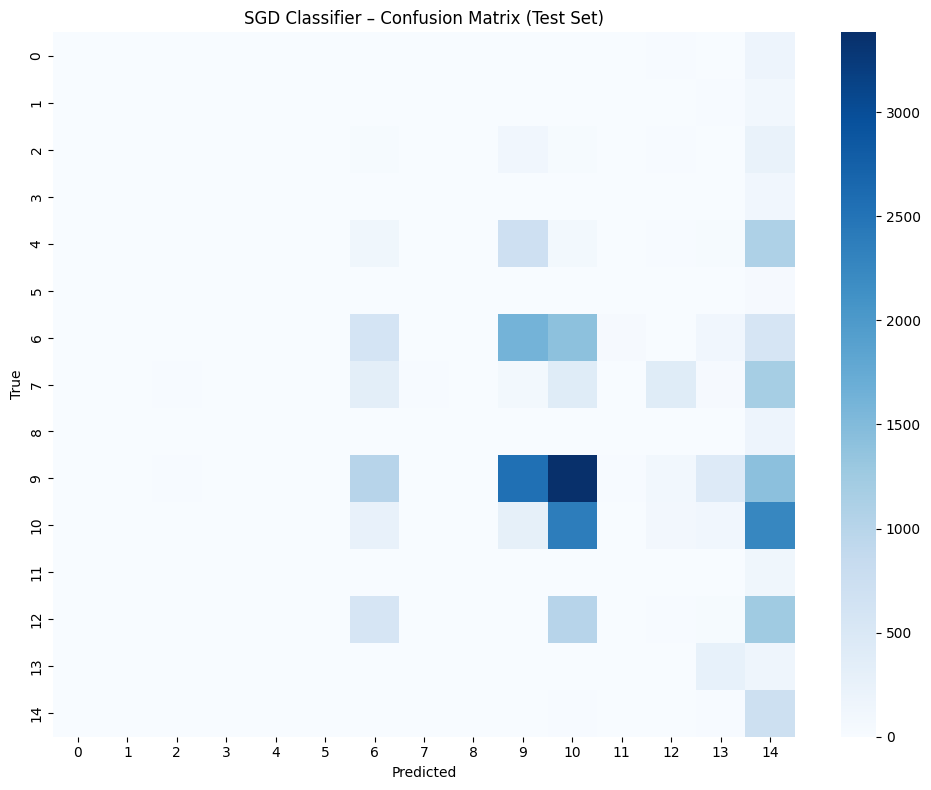

In [ ]:
# Step 21.4 – Evaluate best SGDClassifier on test set (memory-safe with skip logic)

import os
import numpy as np
import gc
import joblib
import pickle
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# === A. Paths ===
X_test_dir = 'test_parts_reduced'
y_test_dir = 'test_parts'
model_path = 'models/sgd_best_model.pkl'
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)

# === B. Output paths (with skip logic)
pred_path = os.path.join(results_dir, 'sgd_test_preds.npy')
label_path = os.path.join(results_dir, 'sgd_test_labels.npy')

if os.path.exists(pred_path) and os.path.exists(label_path):
    print(f"⏩ Skipping evaluation — predictions already saved at: {results_dir}")
else:
    # === C. Load class names
    with open('train_label_classes.pkl', 'rb') as f:
        class_names = pickle.load(f)

    # === D. Load trained model
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"❌ Model not found at: {model_path}")
    else:
        clf = joblib.load(model_path)
        print("✅ Loaded best SGDClassifier model")

    # === E. Predict in batches
    y_true = []
    y_pred = []

    print(f"⚙️ Evaluating on {len(os.listdir(X_test_dir)) // 2} test parts...")

    for part_file in sorted(os.listdir(X_test_dir)):
        if not part_file.startswith('X_test_reduced_part_'):
            continue

        part_id = part_file.split('_')[-1].replace('.npy', '')
        x_path = os.path.join(X_test_dir, part_file)
        y_path = os.path.join(y_test_dir, f'y_test_part_{part_id}.npy')

        X = np.load(x_path)
        y = np.load(y_path)

        preds = clf.predict(X)

        y_true.extend(y)
        y_pred.extend(preds)

        del X, y, preds
        gc.collect()

    # === F. Save predictions
    np.save(pred_path, y_pred)
    np.save(label_path, y_true)
    print(f"✅ Saved predictions and labels to: {pred_path}, {label_path}")

    # === G. Accuracy and report
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

    print(f"\n✅ Test Accuracy: {acc:.4f}")
    print("\n Test Classification Report:\n")
    print(report)

    # === H. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
    plt.title("SGD Classifier – Confusion Matrix (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

##CNN Modeling

### Verification of x and y for all parts

In [ ]:
import os
import numpy as np

# === Configuration ===
folders = {
    "train_parts": "train",
    "val_parts": "val",
    "test_parts": "test"
}

# === Helper function to verify part files ===
def verify_parts(part_dir, prefix):
    print(f"\n Verifying '{part_dir}/' ...")
    x_files = sorted([f for f in os.listdir(part_dir) if f.startswith(f'X_{prefix}')])
    y_files = sorted([f for f in os.listdir(part_dir) if f.startswith(f'y_{prefix}')])

    assert len(x_files) == len(y_files), f"❌ Mismatch in X and y files in '{part_dir}'"

    total_samples = 0
    for x_file, y_file in zip(x_files, y_files):
        x_path = os.path.join(part_dir, x_file)
        y_path = os.path.join(part_dir, y_file)

        X = np.load(x_path, mmap_mode='r')
        y = np.load(y_path, mmap_mode='r')

        assert X.shape[1:] == (128, 128, 3), f"❌ Shape mismatch in {x_file}: {X.shape}"
        assert X.shape[0] == y.shape[0], f"❌ Length mismatch between {x_file} and {y_file}"
        assert y.dtype == np.int64, f"❌ Unexpected dtype in {y_file}: {y.dtype}"

        total_samples += len(X)

    print(f"✅ {prefix.upper()} verified: {len(x_files)} parts, {total_samples} total samples")

# === Run all three checks ===
for folder, prefix in folders.items():
    verify_parts(folder, prefix)


 Verifying 'train_parts/' ...
✅ TRAIN verified: 80 parts, 79124 total samples

 Verifying 'val_parts/' ...
✅ VAL verified: 20 parts, 19782 total samples

 Verifying 'test_parts/' ...
✅ TEST verified: 29 parts, 28853 total samples


### 22.1 From Scratch, Batch wise CNN Training

In [ ]:
# Step 22.1 – Train CNN from scratch using batch-wise loading (RAM-safe, GPU-ready)

import os
import numpy as np
import tensorflow as tf
import gc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# === A. Paths and settings ===
train_dir = 'train_parts'
val_dir = 'val_parts'
model_path = 'models/cnn_model.h5'
num_classes = 15
batch_size = 64
epochs = 10  # You can increase this later if needed
input_shape = (128, 128, 3)

# === B. Skip if model already trained ===
if os.path.exists(model_path):
    print(f"⏩ Skipping training — model already exists at {model_path}")
else:
    # === C. Build CNN model ===
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print("✅ CNN model built and compiled.")

    # === D. Prepare callbacks ===
    checkpoint_cb = ModelCheckpoint(model_path, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
    earlystop_cb = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_accuracy', mode='max', verbose=1)

    # === E. Get part file lists ===
    train_parts = sorted([f for f in os.listdir(train_dir) if f.startswith('X_train_part')])
    val_parts = sorted([f for f in os.listdir(val_dir) if f.startswith('X_val_part')])

    print(f"⚙️ Training on {len(train_parts)} parts | Validating on {len(val_parts)} parts")

    # === F. Training loop (batch-by-batch) ===
    for epoch in range(epochs):
        print(f"\n🔁 Epoch {epoch + 1}/{epochs}")

        # --- Shuffle train parts ---
        np.random.shuffle(train_parts)

        # --- Training loop ---
        for part_file in train_parts:
            part_id = part_file.split('_')[-1].replace('.npy', '')
            X_path = os.path.join(train_dir, part_file)
            y_path = os.path.join(train_dir, f'y_train_part_{part_id}.npy')

            X = np.load(X_path)
            y = np.load(y_path)

            model.fit(X, y, batch_size=batch_size, epochs=1, verbose=1)

            del X, y
            gc.collect()

        # --- Validation loop ---
        val_accs = []
        for part_file in val_parts:
            part_id = part_file.split('_')[-1].replace('.npy', '')
            X_val = np.load(os.path.join(val_dir, part_file))
            y_val = np.load(os.path.join(val_dir, f'y_val_part_{part_id}.npy'))

            val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
            val_accs.append(val_acc)

            del X_val, y_val
            gc.collect()

        avg_val_acc = np.mean(val_accs)
        print(f" Epoch {epoch + 1} average val accuracy: {avg_val_acc:.4f}")

        # === Manually trigger checkpoint ===
        if checkpoint_cb.monitor_op(avg_val_acc, checkpoint_cb.best):
            print(" Saving best model (manual check)...")
            model.save(model_path)
            checkpoint_cb.best = avg_val_acc

    print(f"\n✅ CNN training complete. Best model saved at: {model_path}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ CNN model built and compiled.
⚙️ Training on 80 parts | Validating on 20 parts

🔁 Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.8321 - loss: 1.2728
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0520 - loss: 15.0051
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0000e+00 - loss: 3.5834
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.0000e+00 - loss: 3.6317
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0000e+00 - loss: 2.5138
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 2.0066
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0000e+00 - loss: 2.8943
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0000e+00 - loss: 2.2434
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 1.0516
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6461 - loss: 1.0152
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0819
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0

 Epoch 1 average val accuracy: 0.2612
 Saving best model (manual check)...

🔁 Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0030 - loss: 4.3417    
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.1396 - loss: 2.1244
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0072 - loss: 1.8231
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7885 - loss: 0.9161
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0288 - loss: 2.2954
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7038 - loss: 0.9088
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: 5.6376
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9909 - loss: 1.1119
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0440 - loss: 1.4551
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3900 - loss: 0.9505
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1111 - loss: 1.4809
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: 6.0015
16/16 ━━━━━

 Epoch 2 average val accuracy: 0.3469
 Saving best model (manual check)...

🔁 Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1953 - loss: 1.5371
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8230 - loss: 0.5793
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3480 - loss: 1.6332
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0158 - loss: 2.8873
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7802 - loss: 0.8756
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0286 - loss: 2.3712
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9055 - loss: 0.6605
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6935 - loss: 0.8213
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1747 - loss: 1.4593
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7604 - loss: 0.8663
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5322 - loss: 0.9306
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0000e+00 - loss: 5.8650
16/16 ━━━━━━━━━━━━━

 Epoch 3 average val accuracy: 0.4829
 Saving best model (manual check)...

🔁 Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9508 - loss: 0.2591
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0119 - loss: 2.2207
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7742 - loss: 0.8749
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7487 - loss: 0.8994
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6621 - loss: 0.6466
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9543 - loss: 0.3733
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8272 - loss: 0.7854
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5999 - loss: 0.8064
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8765 - loss: 0.3984
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9002 - loss: 0.2785
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: 4.7415
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9908 - loss: 0.4173
16/16 ━━━━━━━━━━━━━

 Epoch 5 average val accuracy: 0.6629
 Saving best model (manual check)...

🔁 Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9354 - loss: 0.3421
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9296 - loss: 0.2925
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5615 - loss: 1.0970
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5276 - loss: 1.0561
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6757 - loss: 0.7749
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0136 - loss: 2.6425
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3951 - loss: 1.2504
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5049 - loss: 1.1719
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6075 - loss: 1.1360
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5570 - loss: 1.0362
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7475 - loss: 0.6279
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8153 - loss: 0.6364
16/16 ━━━━━━━━━━━━━━━━━

 Epoch 6 average val accuracy: 0.7287
 Saving best model (manual check)...

🔁 Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7656 - loss: 0.6631
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3237 - loss: 2.9069
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7950 - loss: 0.6590
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4332 - loss: 1.7953
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3088 - loss: 1.7643
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8403 - loss: 0.5819
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9790 - loss: 0.1864
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7829 - loss: 0.5338
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7852 - loss: 1.0997
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8014 - loss: 0.5157
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7476 - loss: 0.6895
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6972 - loss: 1.0175
16/16 ━━━━━━━━━━━━━━━━━

 Epoch 8 average val accuracy: 0.7571
 Saving best model (manual check)...

🔁 Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7957 - loss: 0.9416
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7777 - loss: 0.6877
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6157 - loss: 0.9202
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4041 - loss: 1.7270
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5626 - loss: 1.4519
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9145 - loss: 0.3222
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5954 - loss: 0.9670
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8554 - loss: 0.4898
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7107 - loss: 0.8194
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9705 - loss: 0.0806
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1754 - loss: 8.6296
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3792 - loss: 1.5323
16/16 ━━━━━━━━━━━━━━━━━━━

 Epoch 9 average val accuracy: 0.8158
 Saving best model (manual check)...

🔁 Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6529 - loss: 1.0043
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4046 - loss: 2.0599
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4286 - loss: 1.3377
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9914 - loss: 0.0719
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8351 - loss: 0.4377
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9630 - loss: 0.1118
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5105 - loss: 1.2523
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8969 - loss: 0.3243
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9700 - loss: 0.0905
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9952 - loss: 0.0136
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9901 - loss: 0.0252
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9991 - loss: 0.0044
16/16 ━━━━━━━━━━━━━━━━━━

###  tuned cnn and test set evaluated cnn files after deleting cell for tuned cnn and test cnn

In [ ]:
# === Step 22 Cleanup: Delete tuned CNN model + test results, then verify ===
import os

files_to_delete = [
    'models/cnn_model_tuned_simple.h5',
    'results/cnn_test_preds.npy',
    'results/cnn_test_labels.npy'
]

# A. Delete files if present
print("🧹 Deleting files...")
for file_path in files_to_delete:
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"✅ Deleted: {file_path}")
    else:
        print(f"⚠️ Not found (already deleted or never created): {file_path}")

# B. Post-deletion verification
print("\n🔍 Verifying deletion...")
for file_path in files_to_delete:
    if os.path.exists(file_path):
        print(f"❌ Still exists: {file_path}")
    else:
        print(f"✅ Confirmed deleted: {file_path}")

🧹 Deleting files...
✅ Deleted: models/cnn_model_tuned_simple.h5
✅ Deleted: results/cnn_test_preds.npy
✅ Deleted: results/cnn_test_labels.npy

🔍 Verifying deletion...
✅ Confirmed deleted: models/cnn_model_tuned_simple.h5
✅ Confirmed deleted: results/cnn_test_preds.npy
✅ Confirmed deleted: results/cnn_test_labels.npy


### 22.2 set up for CNN tuning

In [ ]:
# ===== Step 22.2-A: Class Weights + Generator Setup ===

import os
import numpy as np
import tensorflow as tf
import gc
import pickle
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import Sequence

# === A. Paths and settings ===
train_dir = 'train_parts'
val_dir   = 'val_parts'
cw_path   = 'cnn_class_weights.pkl'
num_classes = 15
input_shape = (128, 128, 3)
batch_size = 64

# === B. Compute or load class weights ===
if os.path.exists(cw_path):
    print(f"⏩ Skipping class weight computation — already exists at: {cw_path}")
    with open(cw_path, 'rb') as f:
        class_weights_dict = pickle.load(f)
else:
    print(" Computing class weights from training labels...")
    all_labels = []
    label_files = sorted([f for f in os.listdir(train_dir) if f.startswith('y_train_part_')])

    for fname in label_files:
        y_path = os.path.join(train_dir, fname)
        if not os.path.exists(y_path):
            print(f" Missing file: {y_path}")
            continue
        y = np.load(y_path)
        all_labels.extend(y.tolist())
        del y
        gc.collect()

    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=np.arange(num_classes),
                                         y=all_labels)
    class_weights_dict = dict(enumerate(class_weights))

    with open(cw_path, 'wb') as f:
        pickle.dump(class_weights_dict, f)
    print(f"✅ Saved computed class weights to: {cw_path}")

print("✅ Class weights ready:", class_weights_dict)

# === C. Define generator class ===
class PatchDataGenerator(Sequence):
    def __init__(self, part_dir, part_prefix, batch_size=64, input_shape=(128,128,3), shuffle=True):
        super().__init__()
        self.part_dir = part_dir
        self.part_prefix = part_prefix
        self.batch_size = batch_size
        self.input_shape = input_shape
        self.shuffle = shuffle
        self.part_files = sorted([f for f in os.listdir(part_dir) if f.startswith(f'X_{part_prefix}')])
        self.on_epoch_end()

    def __len__(self):
        return len(self.part_files)

    def __getitem__(self, index):
        part_file = self.part_files[index]
        part_id = part_file.split('_')[-1].replace('.npy', '')
        X_path = os.path.join(self.part_dir, part_file)
        y_path = os.path.join(self.part_dir, f'y_{self.part_prefix}_{part_id}.npy')

        X = np.load(X_path)
        y = np.load(y_path)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.part_files)

# === D. Instantiate generators ===
train_gen = PatchDataGenerator(train_dir, 'train', batch_size=batch_size, input_shape=input_shape)
val_gen   = PatchDataGenerator(val_dir,   'val',   batch_size=batch_size, input_shape=input_shape, shuffle=False)

print("✅ Batch generators initialized.")



 Computing class weights from training labels...
✅ Saved computed class weights to: cnn_class_weights.pkl
✅ Class weights ready: {0: np.float64(15.888353413654619), 1: np.float64(12.803236245954693), 2: np.float64(3.22035002035002), 3: np.float64(20.288205128205128), 4: np.float64(1.1021590750800947), 5: np.float64(10.466137566137567), 6: np.float64(0.3885770411295273), 7: np.float64(0.8271810151063719), 8: np.float64(16.53584117032393), 9: np.float64(0.23492176598082004), 10: np.float64(0.252377079246607), 11: np.float64(20.210472541507023), 12: np.float64(1.3111939680172342), 13: np.float64(3.797648188144948), 14: np.float64(2.786546927275929)}
✅ Batch generators initialized.


### Verification of x and y files

In [ ]:
import os

x_files = sorted([f for f in os.listdir('train_parts') if f.startswith('X_train_part_')])
y_files = sorted([f for f in os.listdir('train_parts') if f.startswith('y_train_part_')])

print(f"🧩 Found {len(x_files)} X files and {len(y_files)} Y files")

# Find mismatches
x_ids = {f.split('_')[-1].replace('.npy', '') for f in x_files}
y_ids = {f.split('_')[-1].replace('.npy', '') for f in y_files}
missing = x_ids - y_ids

if missing:
    print(f"⚠️ Missing y_train_part_###.npy files for these parts: {sorted(missing)}")
else:
    print("✅ All part IDs are correctly paired.")

🧩 Found 80 X files and 80 Y files
✅ All part IDs are correctly paired.


### 22.2-B Tuning of CNN

In [ ]:
# ===== Step 22.2-B: Final Tuning (Filename-matched, memory-safe, no assumptions) =====

import os
import numpy as np
import tensorflow as tf
import pickle
import gc
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import Sequence

# === A. Settings ===
train_dir = 'train_parts'
val_dir = 'val_parts'
model_save_path = 'models/cnn_model_tuned_fresh.h5'
class_weights_path = 'cnn_class_weights.pkl'
batch_size = 16
epochs = 20
num_classes = 15
input_shape = (128, 128, 3)

# === B. Skip if model already exists ===
if os.path.exists(model_save_path):
    print(f"⏩ Skipping training — model already exists at: {model_save_path}")

else:
    # === C. Load class weights ===
    with open(class_weights_path, 'rb') as f:
        class_weights = pickle.load(f)
    gc.collect()

    # === D. Improved generator (file-matched, robust) ===
    class PatchDataGenerator(Sequence):
        def __init__(self, part_dir, prefix, batch_size=64, input_shape=(128,128,3), shuffle=True):
            super().__init__()
            self.batch_size = batch_size
            self.input_shape = input_shape
            self.shuffle = shuffle

            self.X_paths = []
            self.y_paths = []

            for f in sorted(os.listdir(part_dir)):
                if f.startswith(f'X_{prefix}_part_'):
                    part_id = f.split('_')[-1].replace('.npy', '')
                    x_path = os.path.join(part_dir, f)
                    y_path = os.path.join(part_dir, f'y_{prefix}_part_{part_id}.npy')
                    if os.path.exists(y_path):
                        self.X_paths.append(x_path)
                        self.y_paths.append(y_path)

            self.on_epoch_end()

        def __len__(self):
            return len(self.X_paths)

        def __getitem__(self, index):
            X = np.load(self.X_paths[index])
            y = np.load(self.y_paths[index])
            gc.collect()
            return X, y

        def on_epoch_end(self):
            if self.shuffle:
                combined = list(zip(self.X_paths, self.y_paths))
                np.random.shuffle(combined)
                self.X_paths, self.y_paths = zip(*combined)

    # === E. Instantiate generators ===
    train_gen = PatchDataGenerator(train_dir, 'train', batch_size=batch_size, input_shape=input_shape)
    val_gen   = PatchDataGenerator(val_dir, 'val', batch_size=batch_size, input_shape=input_shape, shuffle=False)
    gc.collect()

    # === F. Build model ===
    def build_model():
        model = models.Sequential([
            layers.Rescaling(1./255, input_shape=input_shape),
            layers.Conv2D(32, 3, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(64, 3, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.MaxPooling2D(),

            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(num_classes, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    model = build_model()
    gc.collect()

    # === G. Callbacks ===
    cb = [
        callbacks.ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, verbose=1),
        callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ]

    # === H. Train model ===
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=cb,
        verbose=1
    )

    print(f"✅ CNN tuning complete. Best model saved to: {model_save_path}")

    # === I. Cleanup ===
    del model, train_gen, val_gen, history
    gc.collect()

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1949 - loss: 12.4526
Epoch 1: val_accuracy improved from -inf to 0.17157, saving model to models/cnn_model_tuned_fresh.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.1938 - loss: 12.3863 - val_accuracy: 0.1716 - val_loss: 2.7093 - learning_rate: 0.0010
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1032 - loss: 2.8743
Epoch 2: val_accuracy did not improve from 0.17157
80/80 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.1028 - loss: 2.8725 - val_accuracy: 0.0240 - val_loss: 2.7118 - learning_rate: 0.0010
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0593 - loss: 2.3204
Epoch 3: val_accuracy did not improve from 0.17157

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
80/80 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.0593 - loss: 2.3245 - val_accuracy: 0.0240 - val_loss: 2.7120 - learning_rate: 0.0010
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1194 - loss: 2.4796
Epoch 4: val_accuracy did not improve from 0.17157
80/80 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.1189 - loss: 2.4810 - val_accuracy: 0.0240 - v

80/80 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.0709 - loss: 1.7851 - val_accuracy: 0.2632 - val_loss: 2.7020 - learning_rate: 5.0000e-04
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1660 - loss: 2.0199
Epoch 7: val_accuracy did not improve from 0.26317

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
80/80 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1666 - loss: 2.0257 - val_accuracy: 0.0175 - val_loss: 3.6725 - learning_rate: 5.0000e-04
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1446 - loss: 2.2053
Epoch 8: val_accuracy did not improve from 0.26317
80/80 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.1445 - loss: 2.2072 - val_accuracy: 0.0175 - val_loss: 3.8597 - learning_rate: 2.5000e-04
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1859 - loss: 2.0490
Epoch 9: val_accuracy did not improve from 0.26317

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
80/80 ━━━━━━

### 22.3 Evaluation of Best fitted CNN tuned model on test set

In [ ]:
# ===== Step 22.3: CNN Test Evaluation (Batch-safe, skip-safe, no crash) =====

import os
import numpy as np
import tensorflow as tf
import gc
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import Sequence

# === A. Paths and settings ===
test_dir = 'test_parts'
model_path = 'models/cnn_model_tuned_fresh.h5'
preds_path = 'results/cnn_test_preds.npy'
labels_path = 'results/cnn_test_labels.npy'
input_shape = (128, 128, 3)
batch_size = 64

# === B. Skip if already evaluated ===
if os.path.exists(preds_path) and os.path.exists(labels_path):
    print(f"⏩ Skipping test evaluation — files already exist:\n- {preds_path}\n- {labels_path}")

else:
    # === C. Load model ===
    model = load_model(model_path)
    print(f"✅ Loaded trained CNN model from: {model_path}")
    gc.collect()

    # === D. Define test generator ===
    class PatchDataGenerator(Sequence):
        def __init__(self, part_dir, prefix, batch_size=64, input_shape=(128,128,3)):
            super().__init__()
            self.batch_size = batch_size
            self.input_shape = input_shape
            self.X_paths = sorted([os.path.join(part_dir, f) for f in os.listdir(part_dir) if f.startswith(f'X_{prefix}_part_')])
            self.y_paths = [p.replace('X_', 'y_') for p in self.X_paths]

        def __len__(self):
            return len(self.X_paths)

        def __getitem__(self, index):
            X = np.load(self.X_paths[index])
            y = np.load(self.y_paths[index])
            return X, y

    test_gen = PatchDataGenerator(test_dir, 'test', batch_size=batch_size, input_shape=input_shape)

    # === E. Predict batch-by-batch ===
    all_preds = []
    all_labels = []

    for i in range(len(test_gen)):
        X_batch, y_batch = test_gen[i]
        preds = model.predict(X_batch, verbose=0)
        preds_labels = np.argmax(preds, axis=1)

        all_preds.extend(preds_labels.tolist())
        all_labels.extend(y_batch.tolist())

        del X_batch, y_batch, preds, preds_labels
        gc.collect()

        print(f"✅ Processed batch {i+1}/{len(test_gen)}")

    # === F. Save predictions and labels ===
    os.makedirs('results', exist_ok=True)
    np.save(preds_path, np.array(all_preds, dtype=np.uint8))
    np.save(labels_path, np.array(all_labels, dtype=np.uint8))

    print(f"✅ Test predictions saved to: {preds_path}")
    print(f"✅ Test labels saved to: {labels_path}")
    gc.collect()

✅ Loaded trained CNN model from: models/cnn_model_tuned_fresh.h5
✅ Processed batch 1/29
✅ Processed batch 2/29
✅ Processed batch 3/29
✅ Processed batch 4/29
✅ Processed batch 5/29
✅ Processed batch 6/29
✅ Processed batch 7/29
✅ Processed batch 8/29
✅ Processed batch 9/29
✅ Processed batch 10/29
✅ Processed batch 11/29
✅ Processed batch 12/29
✅ Processed batch 13/29
✅ Processed batch 14/29
✅ Processed batch 15/29
✅ Processed batch 16/29
✅ Processed batch 17/29
✅ Processed batch 18/29
✅ Processed batch 19/29
✅ Processed batch 20/29
✅ Processed batch 21/29
✅ Processed batch 22/29
✅ Processed batch 23/29
✅ Processed batch 24/29
✅ Processed batch 25/29
✅ Processed batch 26/29
✅ Processed batch 27/29
✅ Processed batch 28/29
✅ Processed batch 29/29
✅ Test predictions saved to: results/cnn_test_preds.npy
✅ Test labels saved to: results/cnn_test_labels.npy


### 22.4 CNN Classification Report

✅ Test Accuracy: 0.1856

 Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       214
           1      0.000     0.000     0.000       132
           2      0.000     0.000     0.000       464
           3      0.000     0.000     0.000       144
           4      0.000     0.000     0.000      2090
           5      0.000     0.000     0.000        73
           6      0.000     0.000     0.000      4387
           7      0.000     0.000     0.000      2531
           8      0.000     0.000     0.000       179
           9      0.000     0.000     0.000      8960
          10      0.193     0.977     0.322      5438
          11      0.000     0.000     0.000       153
          12      0.000     0.000     0.000      2888
          13      0.033     0.095     0.049       440
          14      0.000     0.000     0.000       760

    accuracy                          0.186     28853
   macro avg      0.015     0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


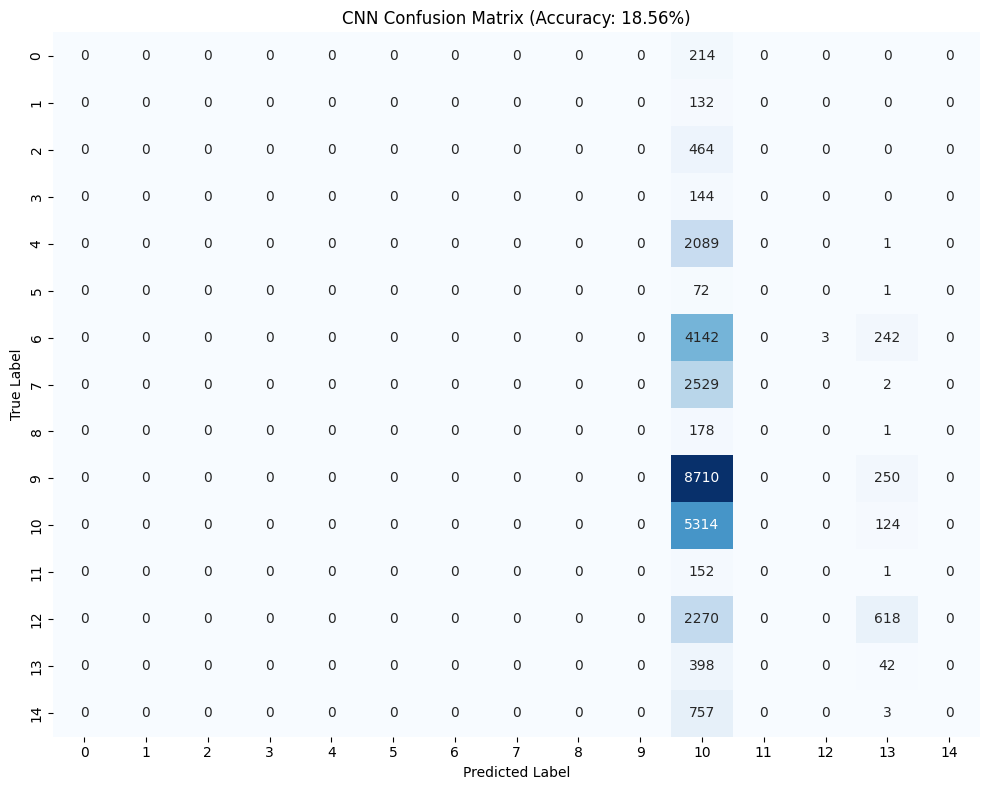

In [ ]:
# ===== Step 22.4: CNN Test Confusion Matrix and Accuracy Report =====

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# === A. Load saved predictions and labels ===
preds = np.load('results/cnn_test_preds.npy')
labels = np.load('results/cnn_test_labels.npy')

# === B. Compute confusion matrix and accuracy ===
cm = confusion_matrix(labels, preds)
acc = accuracy_score(labels, preds)

print(f"✅ Test Accuracy: {acc:.4f}\n")

# Optional detailed report
print(" Classification Report:")
print(classification_report(labels, preds, digits=3))

# === C. Plot confusion matrix ===
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'CNN Confusion Matrix (Accuracy: {acc:.2%})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

### 23.1 Build and save Base TL model

In [3]:
 # ===== Step 23.1: Load & Build Transfer Learning Model (MobileNetV2 base frozen) =====

import os
import tensorflow as tf
from tensorflow.keras import layers, models
import gc

# === A. Settings ===
model_save_path = 'models/tl_mobilenetv2_base.h5'
input_shape = (128, 128, 3)
num_classes = 15

# === B. Skip logic ===
if os.path.exists(model_save_path):
    print(f"⏩ Skipping model creation — already exists at: {model_save_path}")

else:
    # === C. Load pretrained MobileNetV2 base ===
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )
    base_model.trainable = False  # Freeze base layers

    # === D. Add custom classification head ===
    model = models.Sequential([
        tf.keras.Input(shape=input_shape),
        base_model,
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])

    # === E. Compile model ===
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # === F. Save model ===
    os.makedirs('models', exist_ok=True)
    model.save(model_save_path)
    print(f"✅ Base TL model built and saved to: {model_save_path}")

    # Cleanup
    del model, base_model
    gc.collect()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


✅ Base TL model built and saved to: models/tl_mobilenetv2_base.h5


### 23.2 Training TL model

In [5]:
# ===== Step 23.2: Train Transfer Learning Model (MobileNetV2 frozen base) =====

import os
import numpy as np
import tensorflow as tf
import pickle
import gc
from tensorflow.keras.models import load_model
from tensorflow.keras import callbacks
from tensorflow.keras.utils import Sequence

# === A. Paths and settings ===
train_dir = 'train_parts'
val_dir = 'val_parts'
base_model_path = 'models/tl_mobilenetv2_base.h5'
tuned_model_path = 'models/tl_mobilenetv2_tuned.h5'
class_weights_path = 'cnn_class_weights.pkl'
batch_size = 16
epochs = 20
input_shape = (128, 128, 3)

# === B. Skip if already trained ===
if os.path.exists(tuned_model_path):
    print(f"⏩ Skipping training — model already exists at: {tuned_model_path}")

else:
    # === C. Load model and recompile (Fix for eager execution + generator bug) ===
    model = load_model(base_model_path)

    # ✅ FIX: Recompile the model after loading
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Load class weights
    with open(class_weights_path, 'rb') as f:
        class_weights = pickle.load(f)
    gc.collect()

    # === D. Generator using real file lists ===
    class PatchDataGenerator(Sequence):
        def __init__(self, part_dir, prefix, input_shape, shuffle=True):
            super().__init__()
            self.input_shape = input_shape
            self.shuffle = shuffle
            self.X_paths = sorted([os.path.join(part_dir, f) for f in os.listdir(part_dir) if f.startswith(f'X_{prefix}_part_')])
            self.y_paths = [p.replace('X_', 'y_') for p in self.X_paths]
            self.on_epoch_end()

        def __len__(self):
            return len(self.X_paths)

        def __getitem__(self, index):
            X = np.load(self.X_paths[index])
            y = np.load(self.y_paths[index])
            gc.collect()
            return X, y

        def on_epoch_end(self):
            if self.shuffle:
                combined = list(zip(self.X_paths, self.y_paths))
                np.random.shuffle(combined)
                self.X_paths, self.y_paths = zip(*combined)

    train_gen = PatchDataGenerator(train_dir, 'train', input_shape=input_shape, shuffle=True)
    val_gen = PatchDataGenerator(val_dir, 'val', input_shape=input_shape, shuffle=False)
    gc.collect()

    # === E. Callbacks ===
    cb = [
        callbacks.ModelCheckpoint(tuned_model_path, monitor='val_accuracy', save_best_only=True, verbose=1),
        callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ]

    # === F. Train the model ===
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=cb,
        verbose=1
    )

    print(f"✅ Transfer Learning training complete. Model saved at: {tuned_model_path}")

    # === G. Cleanup ===
    del model, train_gen, val_gen, history
    gc.collect()

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1058 - loss: 4.8136
Epoch 1: val_accuracy improved from -inf to 0.16793, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.1060 - loss: 4.8059 - val_accuracy: 0.1679 - val_loss: 2.6040 - learning_rate: 0.0010
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2071 - loss: 2.2742
Epoch 2: val_accuracy improved from 0.16793 to 0.33748, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.2073 - loss: 2.2755 - val_accuracy: 0.3375 - val_loss: 2.0190 - learning_rate: 0.0010
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3245 - loss: 1.6325
Epoch 3: val_accuracy improved from 0.33748 to 0.41396, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.3246 - loss: 1.6326 - val_accuracy: 0.4140 - val_loss: 1.6855 - learning_rate: 0.0010
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4194 - loss: 1.1775
Epoch 4: val_accuracy improved from 0.41396 to 0.47649, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.4196 - loss: 1.1778 - val_accuracy: 0.4765 - val_loss: 1.5487 - learning_rate: 0.0010
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5002 - loss: 0.8903
Epoch 5: val_accuracy improved from 0.47649 to 0.51840, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.5004 - loss: 0.8923 - val_accuracy: 0.5184 - val_loss: 1.4229 - learning_rate: 0.0010
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4887 - loss: 0.7848
Epoch 6: val_accuracy improved from 0.51840 to 0.55313, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.4895 - loss: 0.7854 - val_accuracy: 0.5531 - val_loss: 1.3513 - learning_rate: 0.0010
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5759 - loss: 1.0527
Epoch 7: val_accuracy improved from 0.55313 to 0.62491, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.5762 - loss: 1.0489 - val_accuracy: 0.6249 - val_loss: 1.1498 - learning_rate: 0.0010
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6777 - loss: 0.5769
Epoch 8: val_accuracy did not improve from 0.62491
80/80 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.6778 - loss: 0.5771 - val_accuracy: 0.5691 - val_loss: 1.2699 - learning_rate: 0.0010
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6922 - loss: 0.4848
Epoch 9: val_accuracy improved from 0.62491 to 0.63669, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6922 - loss: 0.4850 - val_accuracy: 0.6367 - val_loss: 1.0922 - learning_rate: 0.0010
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7296 - loss: 0.4910
Epoch 10: val_accuracy did not improve from 0.63669
80/80 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7297 - loss: 0.4903 - val_accuracy: 0.6266 - val_loss: 1.0906 - learning_rate: 0.0010
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7755 - loss: 0.4056
Epoch 11: val_accuracy improved from 0.63669 to 0.65479, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7756 - loss: 0.4053 - val_accuracy: 0.6548 - val_loss: 1.0048 - learning_rate: 0.0010
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7643 - loss: 0.3007
Epoch 12: val_accuracy did not improve from 0.65479
80/80 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.7645 - loss: 0.3013 - val_accuracy: 0.6189 - val_loss: 1.1422 - learning_rate: 0.0010
Epoch 13/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7974 - loss: 0.2799
Epoch 13: val_accuracy did not improve from 0.65479

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
80/80 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7973 - loss: 0.2804 - val_accuracy: 0.6500 - val_loss: 1.0352 - learning_rate: 0.0010
Epoch 14/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8378 - loss: 0.2471
Epoch 14: val_accuracy improved from 0.65479 to 0.67142, saving model to models/tl_mobilenetv2_tuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8377 - loss: 0.2473 - val_accuracy: 0.6714 - val_loss: 0.9889 - learning_rate: 5.0000e-04
Epoch 15/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8242 - loss: 0.2499
Epoch 15: val_accuracy did not improve from 0.67142
80/80 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8244 - loss: 0.2497 - val_accuracy: 0.6422 - val_loss: 1.0368 - learning_rate: 5.0000e-04
Epoch 16/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8400 - loss: 0.2053
Epoch 16: val_accuracy did not improve from 0.67142

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
80/80 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.8402 - loss: 0.2055 - val_accuracy: 0.6692 - val_loss: 0.9962 - learning_rate: 5.0000e-04
Epoch 17/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8655 - loss: 0.1930
Epoch 17: val_accuracy did not improve from 0.67142
80/80 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8654 - loss: 0.1932 - val_ac

### 23.3 Fine tuning mobilenetv2 last lunfrozen layers

In [8]:
# ===== Step 23.3: Fine-Tune TL Model (Unfreeze last 30 layers of MobileNetV2) =====

import os
import numpy as np
import tensorflow as tf
import pickle
import gc
from tensorflow.keras.models import load_model
from tensorflow.keras import callbacks
from tensorflow.keras.utils import Sequence

# === A. Paths and settings ===
train_dir = 'train_parts'
val_dir = 'val_parts'
tuned_model_path = 'models/tl_mobilenetv2_tuned.h5'
finetuned_model_path = 'models/tl_mobilenetv2_finetuned.h5'
class_weights_path = 'cnn_class_weights.pkl'
batch_size = 16
epochs = 15
input_shape = (128, 128, 3)

# === B. Skip if fine-tuned model already exists ===
if os.path.exists(finetuned_model_path):
    print(f"⏩ Skipping fine-tuning — model already exists at: {finetuned_model_path}")

else:
    # === C. Load tuned model ===
    model = load_model(tuned_model_path)

    # ✅ Identify the MobileNetV2 base inside the Sequential model
    base_model = None
    for layer in model.layers:
        if isinstance(layer, tf.keras.Model) and len(layer.layers) > 100:
            base_model = layer
            break

    if base_model is None:
        raise ValueError("❌ MobileNetV2 base not found in model.")

    for layer in base_model.layers[-30:]:
        layer.trainable = True

    print("✅ Successfully unfroze last 30 layers of MobileNetV2.")

    # === D. Recompile with lower learning rate for fine-tuning ===
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # === E. Load class weights ===
    with open(class_weights_path, 'rb') as f:
        class_weights = pickle.load(f)
    gc.collect()

    # === F. Generator for batch loading ===
    class PatchDataGenerator(Sequence):
        def __init__(self, part_dir, prefix, input_shape, shuffle=True):
            super().__init__()
            self.input_shape = input_shape
            self.shuffle = shuffle
            self.X_paths = sorted([os.path.join(part_dir, f) for f in os.listdir(part_dir) if f.startswith(f'X_{prefix}_part_')])
            self.y_paths = [p.replace('X_', 'y_') for p in self.X_paths]
            self.on_epoch_end()

        def __len__(self):
            return len(self.X_paths)

        def __getitem__(self, index):
            X = np.load(self.X_paths[index])
            y = np.load(self.y_paths[index])
            gc.collect()
            return X, y

        def on_epoch_end(self):
            if self.shuffle:
                combined = list(zip(self.X_paths, self.y_paths))
                np.random.shuffle(combined)
                self.X_paths, self.y_paths = zip(*combined)

    train_gen = PatchDataGenerator(train_dir, 'train', input_shape=input_shape, shuffle=True)
    val_gen = PatchDataGenerator(val_dir, 'val', input_shape=input_shape, shuffle=False)
    gc.collect()

    # === G. Callbacks ===
    cb = [
        callbacks.ModelCheckpoint(finetuned_model_path, monitor='val_accuracy', save_best_only=True, verbose=1),
        callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ]

    # === H. Train ===
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=cb,
        verbose=1
    )

    print(f"✅ Fine-tuning complete. Model saved at: {finetuned_model_path}")

    # === I. Cleanup ===
    del model, train_gen, val_gen, history, base_model
    gc.collect()

✅ Successfully unfroze last 30 layers of MobileNetV2.
Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2726 - loss: 3.7540
Epoch 1: val_accuracy improved from -inf to 0.33935, saving model to models/tl_mobilenetv2_finetuned.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.2729 - loss: 3.7396 - val_accuracy: 0.3393 - val_loss: 2.1924 - learning_rate: 1.0000e-05
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3200 - loss: 2.0577
Epoch 2: val_accuracy did not improve from 0.33935
80/80 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.3199 - loss: 2.0589 - val_accuracy: 0.2390 - val_loss: 3.0896 - learning_rate: 1.0000e-05
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3299 - loss: 1.5023
Epoch 3: val_accuracy did not improve from 0.33935

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
80/80 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3300 - loss: 1.5061 - val_accuracy: 0.2186 - val_loss: 3.4447 - learning_rate: 1.0000e-05
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3355 - loss: 1.3359
Epoch 4: val_accuracy did not improve from 0.33935
80/80 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.3357 - loss: 1.3394 - val_accuracy:

### 23.4 Tuned TL and not Fine tuned TL model fitting on Test set

Test predictions saved to: results/tl_test_preds.npy
✅ Test labels saved to: results/tl_test_labels.npy

✅ Test Accuracy: 0.6331

 Classification Report:
                    precision    recall  f1-score   support

  baseball-diamond       0.78      0.45      0.57       214
  basketball-court       0.21      0.06      0.09       132
            bridge       0.23      0.17      0.20       464
ground-track-field       0.33      0.58      0.43       144
            harbor       0.70      0.57      0.63      2090
        helicopter       0.08      0.71      0.14        73
     large-vehicle       0.74      0.49      0.59      4387
             plane       0.90      0.79      0.84      2531
        roundabout       0.07      0.94      0.13       179
              ship       0.81      0.72      0.76      8960
     small-vehicle       0.60      0.83      0.69      5438
 soccer-ball-field       0.14      0.91      0.25       153
      storage-tank       0.99      0.25      0.40      2888
     

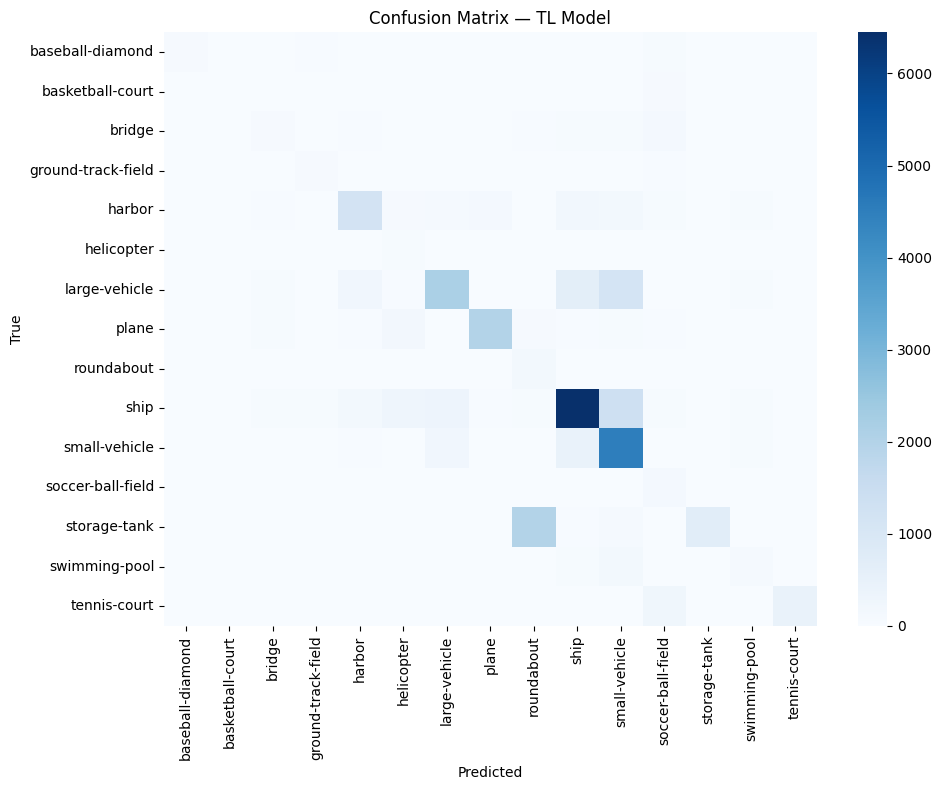

In [9]:
# ===== Step 23.4: Evaluate Transfer Learning Model on Test Set (batch-wise, RAM-safe) =====

import os
import numpy as np
import tensorflow as tf
import pickle
import gc
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === A. Paths ===
test_dir = 'test_parts'
model_path = 'models/tl_mobilenetv2_tuned.h5'
class_names_path = 'train_label_classes.pkl'
preds_save_path = 'results/tl_test_preds.npy'
labels_save_path = 'results/tl_test_labels.npy'

# === B. Skip if already saved ===
if os.path.exists(preds_save_path) and os.path.exists(labels_save_path):
    print(f"⏩ Skipping evaluation — results already saved.")
    y_pred = np.load(preds_save_path)
    y_true = np.load(labels_save_path)

else:
    # === C. Load model and class names ===
    model = load_model(model_path)
    with open(class_names_path, 'rb') as f:
        class_names = pickle.load(f)

    # === D. Load test files ===
    X_files = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.startswith('X_test_part_')])
    y_files = [x.replace('X_', 'y_') for x in X_files]

    y_true = []
    y_pred = []

    # === E. Predict batch-wise ===
    for X_path, y_path in zip(X_files, y_files):
        X = np.load(X_path)
        y = np.load(y_path)
        preds = model.predict(X, verbose=0)
        pred_classes = np.argmax(preds, axis=1)

        y_true.extend(y)
        y_pred.extend(pred_classes)

        del X, y, preds, pred_classes
        gc.collect()

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # === F. Save results ===
    np.save(preds_save_path, y_pred)
    np.save(labels_save_path, y_true)
    print(f"Test predictions saved to: {preds_save_path}")
    print(f"✅ Test labels saved to: {labels_save_path}")

# === G. Metrics ===
acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Test Accuracy: {acc:.4f}\n")

print(" Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# === H. Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix — TL Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

### Confusion Matrix for SGD CLASSIFIER and CNN with class labels

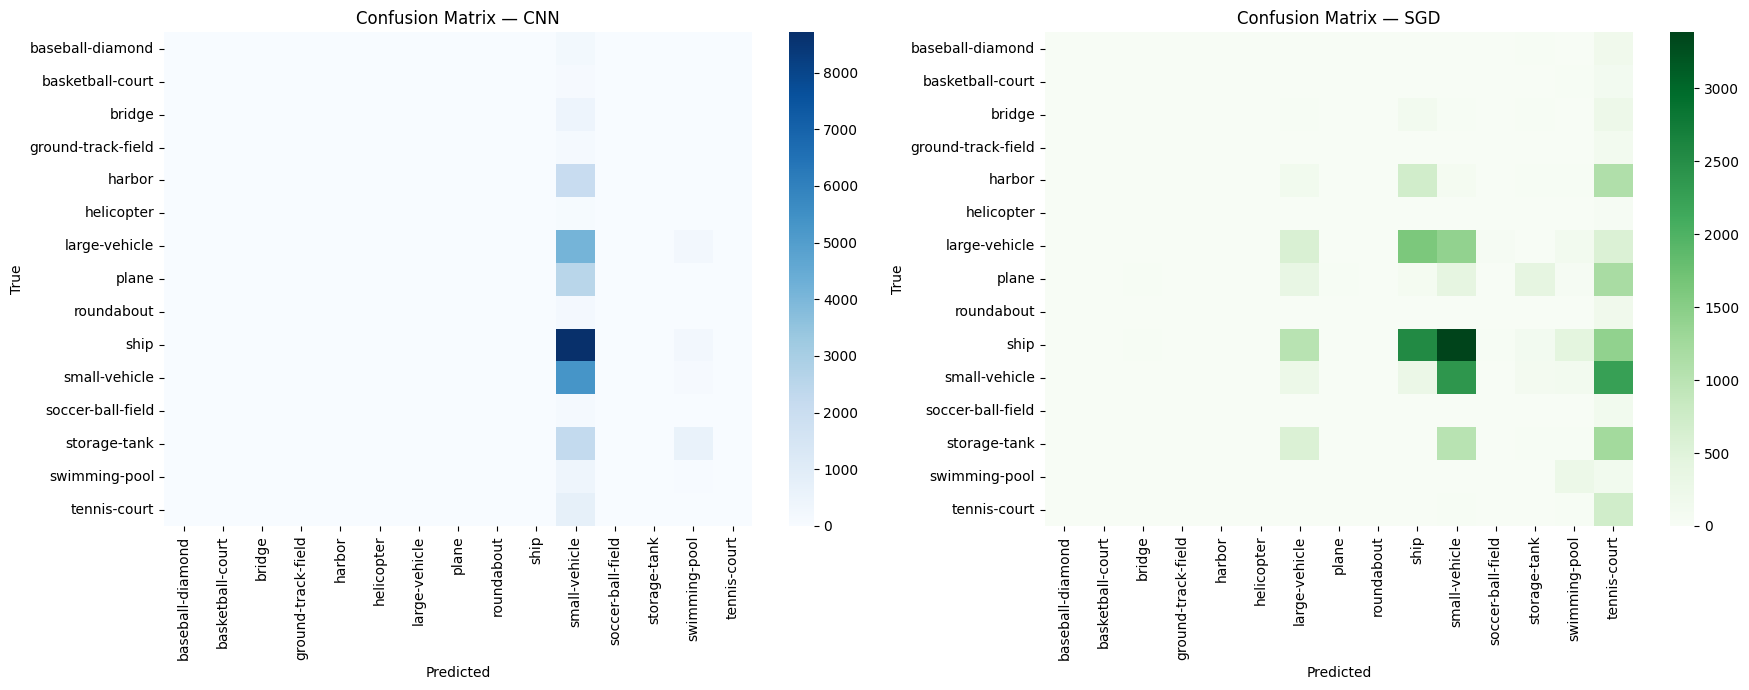

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

# Load class labels
with open('train_label_classes.pkl', 'rb') as f:
    class_names = pickle.load(f)

# Load CNN results
cnn_preds = np.load('results/cnn_test_preds.npy')
cnn_labels = np.load('results/cnn_test_labels.npy')
cm_cnn = confusion_matrix(cnn_labels, cnn_preds)

# Load SGD results
sgd_preds = np.load('results/sgd_test_preds.npy')
sgd_labels = np.load('results/sgd_test_labels.npy')
cm_sgd = confusion_matrix(sgd_labels, sgd_preds)

# Plot both side by side
plt.figure(figsize=(18, 7))

# CNN
plt.subplot(1, 2, 1)
sns.heatmap(cm_cnn, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix — CNN")
plt.xlabel("Predicted")
plt.ylabel("True")

# SGD
plt.subplot(1, 2, 2)
sns.heatmap(cm_sgd, annot=False, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix — SGD")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()